# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re 
import plotly.express as px
import plotly.graph_objects as go
import pycountry
import pycountry_convert as pc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import joblib
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [2]:
df =pd.read_csv("FIFA23_official_data.csv")

<style>
  table {
    border-collapse: collapse;
    width: 100%;
    font-family: Arial, sans-serif;
    font-size: 14px;
  }
  th, td {
    border: 1px solid #ccc;
    padding: 8px;
    text-align: left;
  }
  th {
    background-color: #333;
    color: white;
  }
  tr:nth-child(even) {
    background-color: #f9f9f9;
  }
</style>

<table>
  <thead>
    <tr>
      <th>Column</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>ID</td><td>Unique player ID.</td></tr>
    <tr><td>Name</td><td>Full name of the player.</td></tr>
    <tr><td>Age</td><td>Age of the player.</td></tr>
    <tr><td>Photo</td><td>URL/path to the player's image.</td></tr>
    <tr><td>Nationality</td><td>Country the player represents.</td></tr>
    <tr><td>Flag</td><td>URL/path to the flag image of the nationality.</td></tr>
    <tr><td>Overall</td><td>Overall rating of the player.</td></tr>
    <tr><td>Potential</td><td>Potential max rating the player can achieve.</td></tr>
    <tr><td>Club</td><td>Club the player is currently associated with.</td></tr>
    <tr><td>Club Logo</td><td>URL/path to the club logo image.</td></tr>
    <tr><td>Value</td><td>Estimated market value of the player (e.g., €50M).</td></tr>
    <tr><td>Wage</td><td>Weekly wage of the player (e.g., €200K).</td></tr>
    <tr><td>Special</td><td>Special score combining various performance metrics.</td></tr>
    <tr><td>Preferred Foot</td><td>Dominant foot (Left or Right).</td></tr>
    <tr><td>International Reputation</td><td>Reputation at international level (1-5).</td></tr>
    <tr><td>Weak Foot</td><td>Ability to play with the weaker foot (1-5).</td></tr>
    <tr><td>Skill Moves</td><td>Skill moves rating (1-5 stars).</td></tr>
    <tr><td>Work Rate</td><td>Attacking/Defensive work rate (e.g., High/Medium).</td></tr>
    <tr><td>Body Type</td><td>Player's body type (e.g., Normal, Lean).</td></tr>
    <tr><td>Real Face</td><td>Whether the player's real face is shown in the game.</td></tr>
    <tr><td>Position</td><td>Primary playing position (e.g., ST, CM, GK).</td></tr>
    <tr><td>Joined</td><td>Date when the player joined the current club.</td></tr>
    <tr><td>Loaned From</td><td>Name of club the player is loaned from (if applicable).</td></tr>
    <tr><td>Contract Valid Until</td><td>Year when the player's contract expires.</td></tr>
    <tr><td>Height</td><td>Height of the player (e.g., 6'2").</td></tr>
    <tr><td>Weight</td><td>Weight of the player (e.g., 180lbs).</td></tr>
    <tr><td>Release Clause</td><td>Buyout clause value (e.g., €100M).</td></tr>
    <tr><td>Kit Number</td><td>Jersey number of the player.</td></tr>
    <tr><td>Best Overall Rating</td><td>Best historical overall rating (only available for few players).</td></tr>
  </tbody>
</table>


# Explore data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

In [4]:
df.describe()

ID           Age       Overall     Potential       Special  \
count   17660.000000  17660.000000  17660.000000  17660.000000  17660.000000   
mean   246319.424462     23.127746     63.369592     70.981200   1537.915855   
std     31487.892861      4.639821      8.036268      6.529836    285.893809   
min        16.000000     15.000000     43.000000     42.000000    749.000000   
25%    240732.500000     20.000000     58.000000     67.000000   1387.000000   
50%    257041.000000     22.000000     63.000000     71.000000   1548.000000   
75%    263027.500000     26.000000     69.000000     75.000000   1727.000000   
max    271340.000000     54.000000     91.000000     95.000000   2312.000000   

       International Reputation     Weak Foot   Skill Moves    Kit Number  
count              17660.000000  17660.000000  17660.000000  17625.000000  
mean                   1.106285      2.900340      2.297169     25.037957  
std                    0.407021      0.663523      0.754264     19.154116  
min                    1.000000      1.000000      1.000000      1.000000  
25%                    1.000000      3.000000      2.000000     11.000000  
50%                    1.000000      3.000000      2.000000     22.000000  
75%                    1.000000      3.000000      3.000000     32.000000  
max                    5.000000      5.000000      5.000000     99.000000

In [5]:
df.shape

(17660, 29)

<div style="background-color: #f0f8ff; padding: 12px; border-left: 6px solid #4682b4; font-family: Arial, sans-serif; font-size: 16px;">
  <strong>Shape:</strong> (17660, 29) &nbsp;📊<br>
  <em>→ 17,660 rows and 29 columns</em>
</div>


In [6]:
df.head()

ID             Name  Age  \
0  209658      L. Goretzka   27   
1  212198  Bruno Fernandes   27   
2  224334         M. Acuña   30   
3  192985     K. De Bruyne   31   
4  224232       N. Barella   25   

                                              Photo Nationality  \
0  https://cdn.sofifa.net/players/209/658/23_60.png     Germany   
1  https://cdn.sofifa.net/players/212/198/23_60.png    Portugal   
2  https://cdn.sofifa.net/players/224/334/23_60.png   Argentina   
3  https://cdn.sofifa.net/players/192/985/23_60.png     Belgium   
4  https://cdn.sofifa.net/players/224/232/23_60.png       Italy   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.net/flags/de.png       87         88  FC Bayern München   
1  https://cdn.sofifa.net/flags/pt.png       86         87  Manchester United   
2  https://cdn.sofifa.net/flags/ar.png       85         85         Sevilla FC   
3  https://cdn.sofifa.net/flags/be.png       91         91    Manchester City   
4  https://cdn.sofifa.net/flags/it.png       86         89              Inter   

                                 Club Logo  ... Real Face  \
0   https://cdn.sofifa.net/teams/21/30.png  ...       Yes   
1   https://cdn.sofifa.net/teams/11/30.png  ...       Yes   
2  https://cdn.sofifa.net/teams/481/30.png  ...        No   
3   https://cdn.sofifa.net/teams/10/30.png  ...       Yes   
4   https://cdn.sofifa.net/teams/44/30.png  ...       Yes   

                      Position        Joined Loaned From  \
0  <span class="pos pos28">SUB   Jul 1, 2018         NaN   
1  <span class="pos pos15">LCM  Jan 30, 2020         NaN   
2    <span class="pos pos7">LB  Sep 14, 2020         NaN   
3  <span class="pos pos13">RCM  Aug 30, 2015         NaN   
4  <span class="pos pos13">RCM   Sep 1, 2020         NaN   

   Contract Valid Until  Height  Weight Release Clause Kit Number  \
0                  2026   189cm    82kg          €157M        8.0   
1                  2026   179cm    69kg          €155M        8.0   
2                  2024   172cm    69kg         €97.7M       19.0   
3                  2025   181cm    70kg        €198.9M       17.0   
4                  2026   172cm    68kg        €154.4M       23.0   

  Best Overall Rating  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 29 columns]

# Handling NULLs

In [7]:
df.isna().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          211
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      38
Real Face                      38
Position                       35
Joined                       1098
Loaned From                 16966
Contract Valid Until          361
Height                          0
Weight                          0
Release Clause               1151
Kit Number                     35
Best Overall Rating         17639
dtype: int64

## Percentage of NULLs

In [8]:
df.isna().mean()*100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Photo                        0.000000
Nationality                  0.000000
Flag                         0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.194790
Club Logo                    0.000000
Value                        0.000000
Wage                         0.000000
Special                      0.000000
Preferred Foot               0.000000
International Reputation     0.000000
Weak Foot                    0.000000
Skill Moves                  0.000000
Work Rate                    0.000000
Body Type                    0.215176
Real Face                    0.215176
Position                     0.198188
Joined                       6.217441
Loaned From                 96.070215
Contract Valid Until         2.044168
Height                       0.000000
Weight                       0.000000
Release Clau

**Here are two columns with high percentage of NULLS (> 90 %)<br>**
**So i will `drop` these two columns**

In [9]:
df.drop(columns = ["Best Overall Rating","Loaned From"],inplace = True)

**In `club, Body Type,Real Face,Position,Contract Valid Until,Release Clause and Kit Number` Columns i will drop NULLs as these personal data for each player `can't be filled`**

In [10]:
df.dropna(subset=["Club", "Body Type","Real Face","Position","Contract Valid Until" ,"Kit Number","Joined","Release Clause"],inplace = True)

# Handling Data Types

In [11]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Joined                       object
Contract Valid Until         object
Height                       object
Weight                       object
Release Clause               object
Kit Number                  float64
dtype: object

## Handling Numerical Columns

In [12]:
cols_To_Handle = ["Value","Wage","Release Clause"]

In [13]:
df["Release Clause"]

0          €157M
1          €155M
2         €97.7M
3        €198.9M
4        €154.4M
          ...   
17655      €218K
17656      €188K
17657      €142K
17658      €214K
17659      €131K
Name: Release Clause, Length: 16364, dtype: object

In [14]:
def Corr_Value(Value):
    Value = str(Value).replace("€","")
    Value = str(Value).strip()
    if Value.endswith('M'):
        return int(float(Value[:-1])*1_000_000)
    elif Value.endswith('K'):
        return int(float(Value[:-1])*1_000)
    else:
        return int(Value)

In [15]:
for i in cols_To_Handle:
    df[i] = df[i].apply(Corr_Value)

---------

## Converting Kit Number to int

In [16]:
df["Kit Number"] = df["Kit Number"].astype("int")

In [17]:
df["Kit Number"]

0         8
1         8
2        19
3        17
4        23
         ..
17655    35
17656    21
17657    12
17658    40
17659    30
Name: Kit Number, Length: 16364, dtype: int32

------

## Convertin Contract valid until to integer

In [18]:
df["Contract Valid Until"] = df["Contract Valid Until"].astype(int)

# EDA

## Univariate Analysis

- ### Handling `**Name**` Column

In [19]:
df["Name"].nunique()

15904

**In this dataset there are `15904` Players**

In [20]:
def is_invalid_name(name):
    if pd.isnull(name):
        return True
    name = name.strip()
    if name == "":
        return True
    if re.search(r'\d', name):  
        return True
    if re.search(r"[^{L}\s\.\'\-]", name):
        return True
    if len(name) < 2:
        return True
    return False

df_1 = df.copy()
df_1['InvalidName'] = df_1['Name'].apply(is_invalid_name)

# View the invalid names
invalid_names_df = df_1[df_1['InvalidName']]
print(invalid_names_df[['Name']])


                  Name
0          L. Goretzka
1      Bruno Fernandes
2             M. Acuña
3         K. De Bruyne
4           N. Barella
...                ...
17655    Deng Xiongtao
17656   22 Lim Jun Sub
17657         A. Demir
17658     21 S. Czajor
17659  21 F. Jakobsson

[16364 rows x 1 columns]


**Applying Function and remove white spaces in the name `after initial`**

In [21]:
df['Name'] = df['Name'].apply(lambda name: re.sub(r'^\d+\s+', '', str(name).strip()) if pd.notnull(name) else name)
df["Name"] = df["Name"].str.replace(r"^([A-Z])\. ", r"\1.", regex=True)

----

- ### Exploring `Age` Column

In [22]:
np.sort(df["Age"].unique())

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44], dtype=int64)

**The players in this data range in age from `15 to 44`.**

<Axes: xlabel='Age', ylabel='Count'>

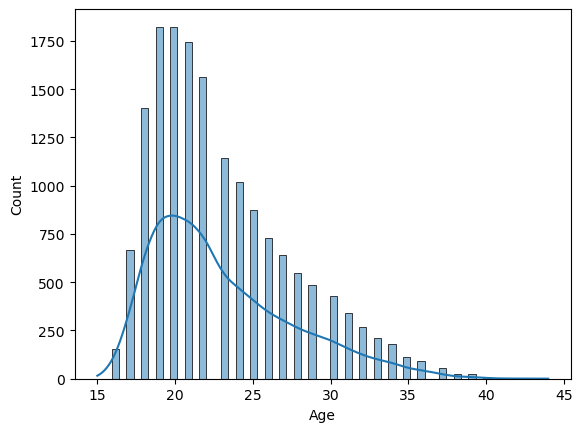

In [23]:
sns.histplot(df["Age"],kde = True)

**Most of the players are in their `twenties`.**

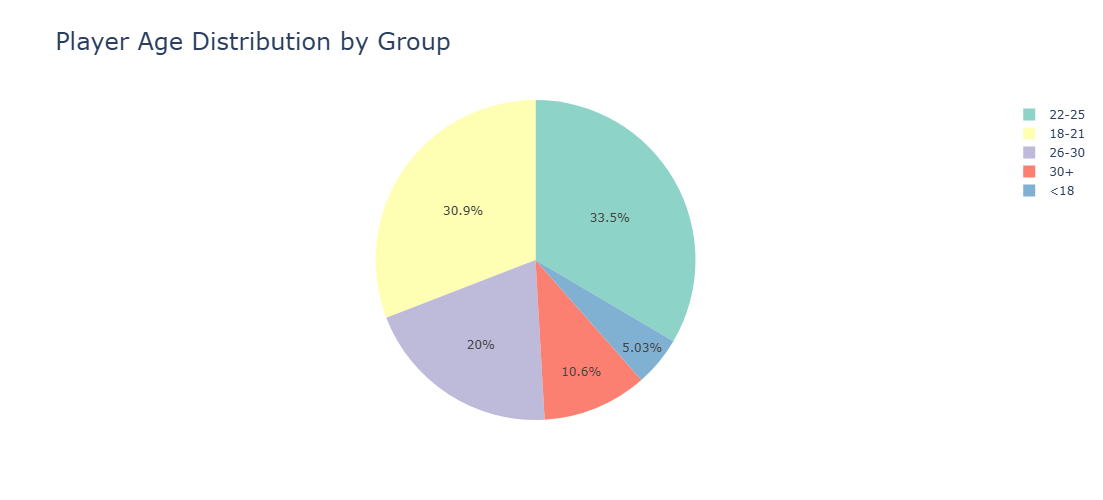

In [24]:
bins = [15, 18, 21, 25, 30, 40]
labels = ['<18', '18-21', '22-25', '26-30', '30+']
df_1['AgeGroup'] = pd.cut(df_1['Age'], bins=bins, labels=labels, right=False)

# Count each group
age_group_counts = df_1['AgeGroup'].value_counts().sort_index().reset_index()
age_group_counts.columns = ['AgeGroup', 'Count']

# Plot with Plotly
fig = px.pie(age_group_counts,
             values='Count',
             names='AgeGroup',
             title='Player Age Distribution by Group',
             color_discrete_sequence=px.colors.qualitative.Set3) 

fig.update_layout(
    width=700,  # increase width
    height=500,  # increase height
    title_font_size=24,
)
fig.show()

--------

- ### Exploring `Nationality` Column

In [25]:
country_counts = df['Nationality'].value_counts().reset_index()
country_counts.columns = ['Country', 'PlayerCount']

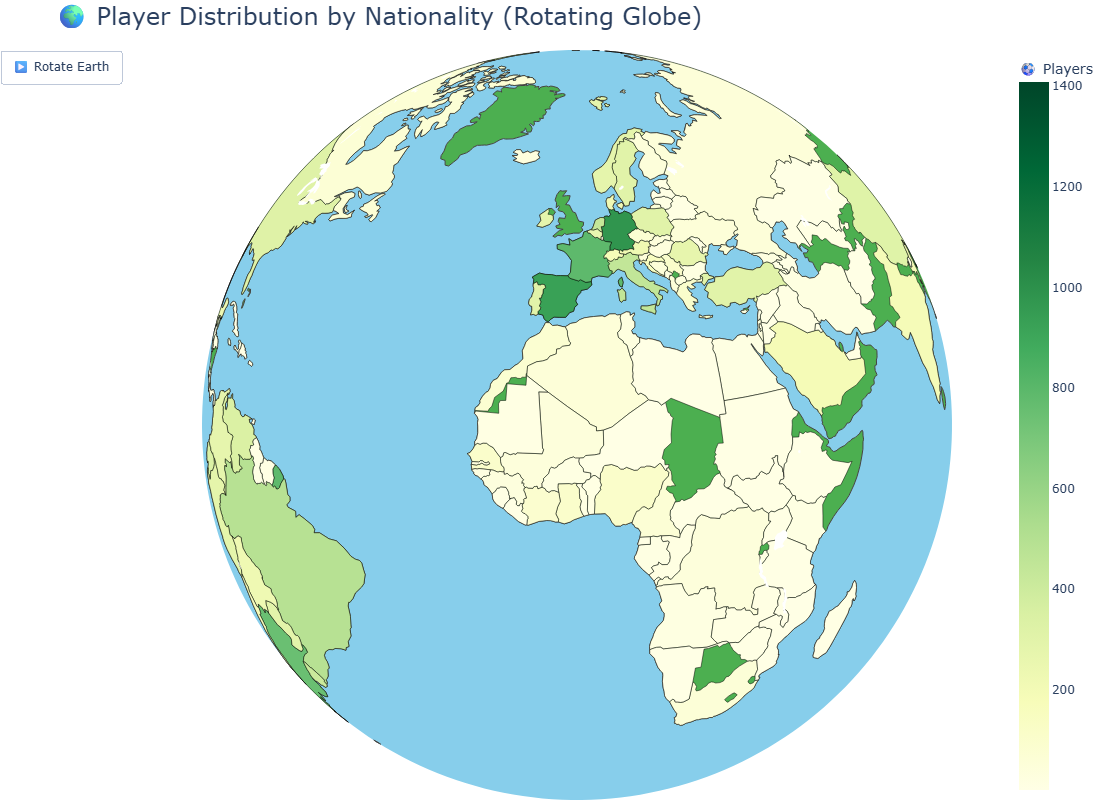

In [26]:
fig = go.Figure(data=go.Choropleth(
    locations=country_counts['Country'],
    locationmode='country names',
    z=country_counts['PlayerCount'],
    colorscale='YlGn',  # Yellow-Green for a natural look
    colorbar_title='⚽ Players',
    marker_line_color='black',
    marker_line_width=0.5,
))

# Set realistic Earth appearance
fig.update_geos(
    projection_type="orthographic",  # 3D ball view
    showland=True,
    landcolor="#4CAF50",       # Natural green
    oceancolor="#87CEEB",      # Sky blue ocean
    showocean=True,
    showcoastlines=True,
    coastlinecolor="#444",     # Dark coastlines
)

# Create rotation frames
frames = []
for lon in np.linspace(0, 360, 60):
    frames.append(go.Frame(layout=dict(
        geo=dict(projection_rotation=dict(lon=lon))
    )))

# Layout & animation button
fig.update_layout(
    title_text='🌍 Player Distribution by Nationality (Rotating Globe)',
    geo=dict(
        showframe=False,
        projection_rotation=dict(lon=0, lat=20),
    ),
    margin={"r":0,"t":50,"l":0,"b":0},
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='▶️ Rotate Earth',
            method='animate',
            args=[None, {
                "frame": {"duration": 100, "redraw": True},
                "fromcurrent": True,
                "transition": {"duration": 0}
            }]
        )]
    )]
)

# Attach frames
fig.frames = frames
fig.update_layout(
    width=800,  # increase width
    height=800,  # increase height
    title_font_size=24,
)
# Show the interactive rotating Earth
fig.show()

-------

- ### Exploring `Overall` Column

In [27]:
np.sort(df["Overall"].unique())

array([44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91],
      dtype=int64)

**The Overall Rating starts from `44 to 91`**

<Axes: xlabel='Overall', ylabel='Count'>

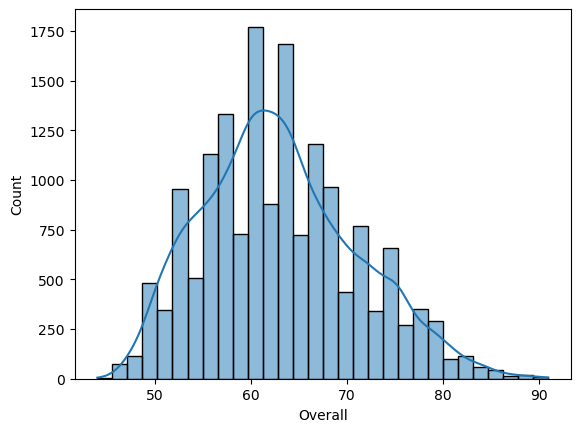

In [28]:
sns.histplot(df["Overall"],kde = True,bins = 30)

**the distribution show that the most players hava overall `around 60`**

----

In [29]:
np.sort(df["Potential"].unique())

array([47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
       81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95],
      dtype=int64)

<Axes: xlabel='Potential', ylabel='Count'>

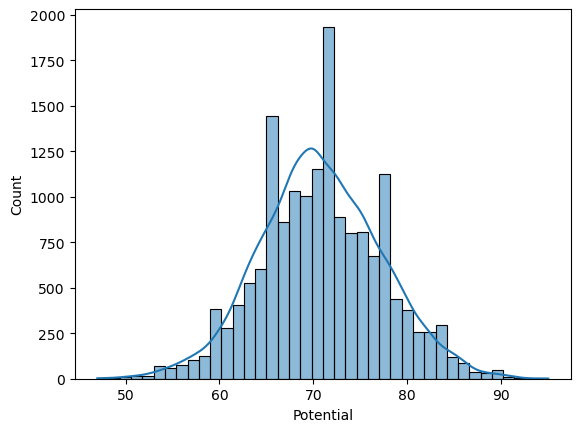

In [30]:
sns.histplot(df["Potential"],kde = True,bins = 40)

**The most players have potential max score `around 70`**

----

- ### Exploring `Club` column

In [31]:
df["Club"].unique()

array(['FC Bayern München', 'Manchester United', 'Sevilla FC',
       'Manchester City', 'Inter', 'Real Madrid CF', 'Al Ahli',
       'Borussia Dortmund', 'Roma', 'Lazio', 'Real Sociedad',
       'Atlético de Madrid', 'Tottenham Hotspur', 'FC Barcelona',
       'Juventus', 'Eintracht Frankfurt', 'Liverpool',
       'Club Nacional de Football', 'Paris Saint-Germain', 'AC Milan',
       'Chelsea', 'Real Betis Balompié', 'Atalanta', 'Aston Villa',
       'River Plate', 'Stade Rennais FC', 'Olympique Lyonnais',
       'Rangers FC', 'FC Porto', 'RCD Espanyol de Barcelona',
       'Leicester City', 'SL Benfica', 'Valencia CF', 'Newcastle United',
       'AFC Richmond', 'Athletic Club de Bilbao',
       'Unión Deportiva Almería', 'Wolverhampton Wanderers',
       'Rayo Vallecano', 'Bayer 04 Leverkusen', 'Olympique de Marseille',
       'Villarreal CF', 'Fiorentina', 'VfL Wolfsburg', 'Al Nassr',
       'Shanghai Port FC', 'Hellas Verona', 'Montpellier Hérault SC',
       'Wuhan Three Towns', '

In [32]:
df['Club'] = df['Club'].apply(
    lambda name: re.sub(r'\d+', '', str(name).strip()) if pd.notnull(name) else name
)
df["Club"] = df["Club"].str.replace(r"^([A-Z])\. ", r"\1.", regex=True)
df['Club'] = df['Club'].str.strip()
df['Club'] = df['Club'].str.replace(r'^\.\s+', '', regex=True)

-----------

- ### Exploring `Value` Column

In [33]:
np.sort(df["Value"].unique())

array([    10000,     15000,     25000,     30000,     35000,     40000,
           45000,     50000,     60000,     70000,     80000,     90000,
          100000,    110000,    120000,    130000,    140000,    150000,
          160000,    170000,    180000,    190000,    200000,    210000,
          220000,    230000,    240000,    250000,    275000,    300000,
          325000,    350000,    375000,    400000,    425000,    450000,
          475000,    500000,    525000,    550000,    575000,    600000,
          625000,    650000,    675000,    700000,    725000,    750000,
          775000,    800000,    825000,    850000,    875000,    900000,
          925000,    950000,    975000,   1000000,   1100000,   1200000,
         1300000,   1400000,   1500000,   1600000,   1700000,   1800000,
         1900000,   2000000,   2100000,   2200000,   2300000,   2400000,
         2500000,   2600000,   2700000,   2800000,   2900000,   3000000,
         3100000,   3200000,   3300000,   3400000, 

**The player's Value ranges from `10000 Euro to 190500000 Euro`** -- high variance

--------



In [34]:
np.sort(df["Wage"].unique())

array([   500,    550,    600,    650,    700,    750,    800,    850,
          900,    950,   1000,   2000,   3000,   4000,   5000,   6000,
         7000,   8000,   9000,  10000,  11000,  12000,  13000,  14000,
        15000,  16000,  17000,  18000,  19000,  20000,  21000,  22000,
        23000,  24000,  25000,  26000,  27000,  28000,  29000,  30000,
        31000,  32000,  33000,  34000,  35000,  36000,  37000,  38000,
        39000,  40000,  41000,  42000,  43000,  44000,  45000,  46000,
        47000,  48000,  49000,  50000,  51000,  52000,  53000,  54000,
        55000,  56000,  57000,  58000,  59000,  60000,  61000,  62000,
        63000,  64000,  65000,  66000,  67000,  68000,  69000,  70000,
        71000,  72000,  73000,  74000,  75000,  76000,  77000,  78000,
        79000,  80000,  81000,  82000,  83000,  84000,  85000,  86000,
        87000,  88000,  89000,  90000,  95000, 100000, 105000, 110000,
       115000, 120000, 125000, 130000, 135000, 140000, 145000, 150000,
      

**The player's weekly salary ranges `from 500 to 450000`**

-----------

- ### Exploring `Special` Column

In [35]:
df["Special"].unique()

array([2312, 2305, 2303, ...,  759,  758,  749], dtype=int64)

<Axes: xlabel='Special', ylabel='Count'>

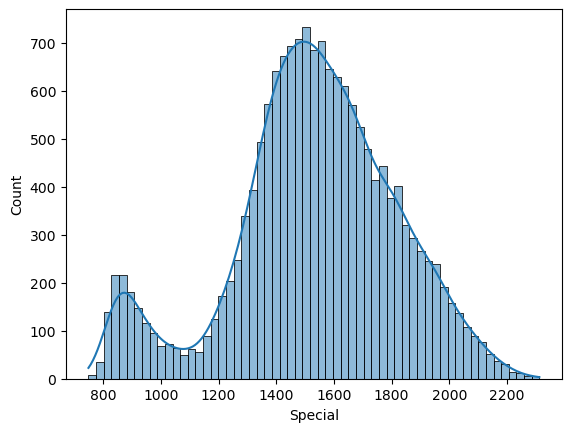

In [36]:
sns.histplot(df["Special"],kde = True)

-------

- ### Exploring `Preferred Foot` Column

In [37]:
foot_counts = df["Preferred Foot"].keys()

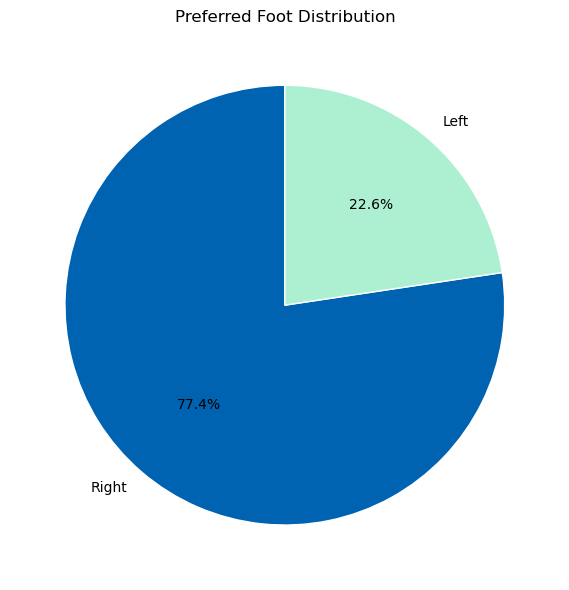

In [38]:
foot_counts = df["Preferred Foot"].value_counts()

colors = ["#0063B2","#ADEFD1"]

plt.figure(figsize=(6, 6))
plt.pie(
    foot_counts.values,       # Sizes
    labels=foot_counts.index, # Category names
    autopct='%1.1f%%',
    startangle=90,
    colors = colors,
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Preferred Foot Distribution")
plt.tight_layout()

plt.show()

-----------

- ### Exploring `International Reputation` Column

In [39]:
Intern_counts= df["International Reputation"].value_counts()
Intern_counts

International Reputation
1.0    15241
2.0      773
3.0      281
4.0       63
5.0        6
Name: count, dtype: int64

<Axes: xlabel='International Reputation', ylabel='count'>

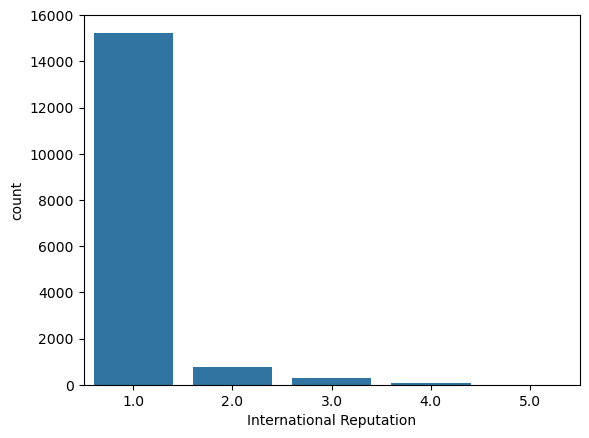

In [40]:
sns.barplot(df["International Reputation"].value_counts())

**The most common categotr is 1 a little (no recognition internationally) and there are only `6 players a Global superstar`**

------

- ### Exploring `Weak Foot` Column

In [41]:
df["Weak Foot"].value_counts()

Weak Foot
3.0    10226
2.0     3843
4.0     1908
5.0      229
1.0      158
Name: count, dtype: int64

<Axes: xlabel='Weak Foot', ylabel='count'>

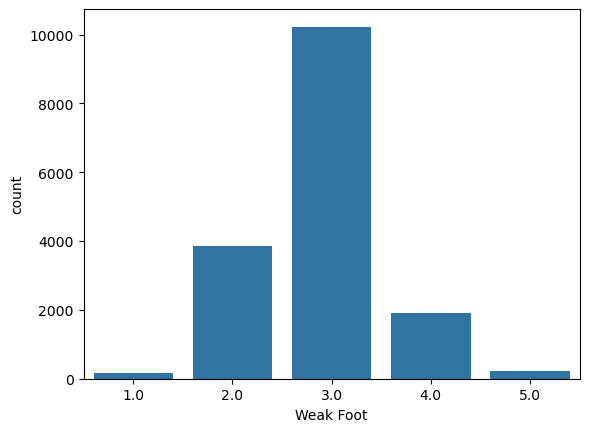

In [42]:
sns.barplot(df["Weak Foot"].value_counts())

**As shown the `most players have the ability` to play with the weak Foot and this may be an indication that the player is good.**

------

- ### Exploring `Skill Moves` Column

In [43]:
df["Skill Moves"].value_counts()

Skill Moves
2.0    9176
3.0    4410
1.0    1765
4.0     958
5.0      55
Name: count, dtype: int64

<Axes: xlabel='Skill Moves', ylabel='count'>

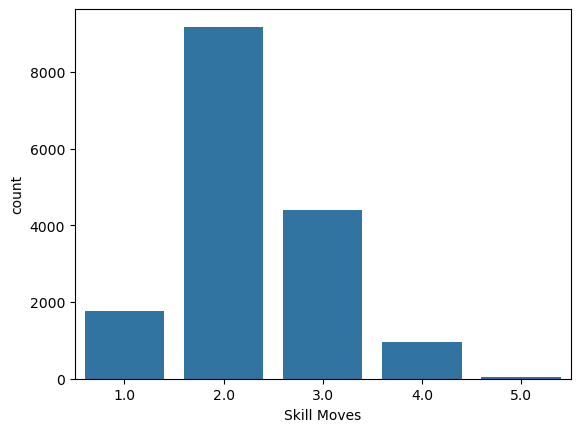

In [44]:
sns.barplot(df["Skill Moves"].value_counts())

**Only few players have High skill Moves Rate**

------

- ### Exploring Work Rate

In [45]:
df["Work Rate"].value_counts()

Work Rate
Medium/ Medium    9450
High/ Medium      2796
Medium/ High      1298
High/ High         741
Medium/ Low        688
High/ Low          650
Low/ Medium        347
Low/ High          323
Low/ Low            71
Name: count, dtype: int64

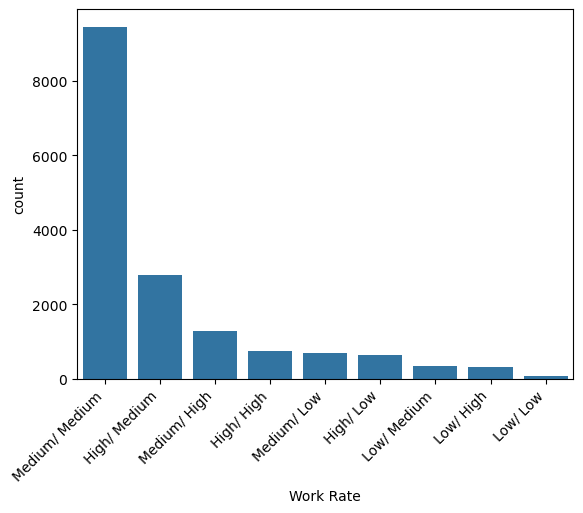

In [46]:
sns.barplot(df["Work Rate"].value_counts())
plt.xticks(rotation = 45,ha = "right");

-----

- ### Exploring Body Type Column

In [47]:
df["Body Type"].value_counts()

Body Type
Normal (170-185)    5809
Lean (170-185)      3679
Normal (185+)       3191
Lean (185+)         1716
Normal (170-)        654
Lean (170-)          499
Stocky (170-185)     396
Stocky (185+)        223
Unique               123
Stocky (170-)         74
Name: count, dtype: int64

In [48]:
df[df["Body Type"] == "Stocky (170-185)"]["Height"].agg(['min', 'max'])

min    171cm
max    184cm
Name: Height, dtype: object

In [49]:
df[df["Body Type"] == "Stocky (185+)"]["Height"].agg(['min', 'max'])

min    185cm
max    202cm
Name: Height, dtype: object

**The numbers next to body type represent `height` and there is already a column for height so I will delete it.**

In [50]:
df["Body Type"] = df["Body Type"].str.replace(r"\s*\([^)]*\)", "", regex=True).str.strip()

<Axes: xlabel='Body Type', ylabel='count'>

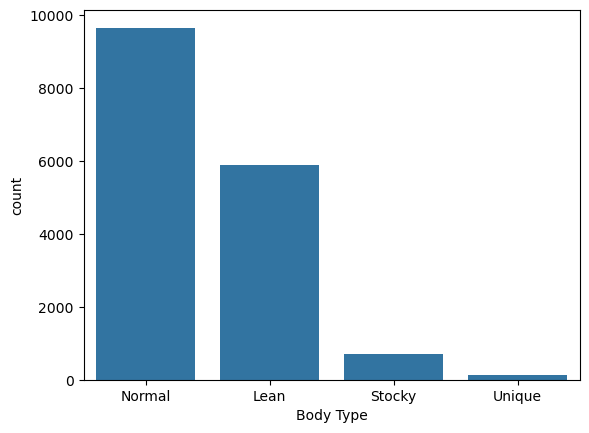

In [51]:
sns.barplot(df["Body Type"].value_counts())

----

- ### Exploring `Real Face` Column

In [52]:
df["Real Face"].value_counts()

Real Face
No     14578
Yes     1786
Name: count, dtype: int64

This column shows Whether the player's real face is shown in the game

---

In [53]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause',
       'Kit Number'],
      dtype='object')

In [54]:
df["Position"].value_counts()

Position
<span class="pos pos28">SUB    6783
<span class="pos pos29">RES    5065
<span class="pos pos4">RCB      406
<span class="pos pos6">LCB      360
<span class="pos pos0">GK       328
<span class="pos pos25">ST      316
<span class="pos pos7">LB       306
<span class="pos pos3">RB       304
<span class="pos pos13">RCM     299
<span class="pos pos15">LCM     284
<span class="pos pos12">RM      262
<span class="pos pos16">LM      250
<span class="pos pos18">CAM     182
<span class="pos pos26">LS      145
<span class="pos pos27">LW      136
<span class="pos pos10">CDM     133
<span class="pos pos23">RW      132
<span class="pos pos24">RS      121
<span class="pos pos9">RDM      119
<span class="pos pos11">LDM     109
<span class="pos pos5">CB        98
<span class="pos pos2">RWB       75
<span class="pos pos8">LWB       61
<span class="pos pos22">LF       29
<span class="pos pos14">CM       22
<span class="pos pos20">RF       20
<span class="pos pos21">CF       11
<span class="pos po

In [55]:
df["Position"] = df["Position"].str.replace(r"<[^>]+>", "", regex=True).str.strip()


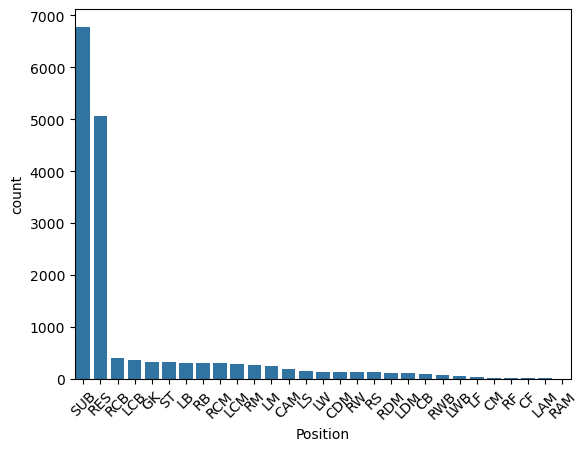

In [56]:
sns.barplot(df["Position"].value_counts())
plt.xticks(rotation = 45);

| Abbreviation | Full Name                         | Role / Description                                                                 |
|--------------|-----------------------------------|-------------------------------------------------------------------------------------|
| **GK**       | Goalkeeper                        | Guards the goal; only player allowed to use hands within penalty area.              |
| **RCB**      | Right Centre-Back                 | Central defender on the right side; blocks shots, marks attackers.                  |
| **LCB**      | Left Centre-Back                  | Central defender on the left side; blocks shots, marks attackers.                   |
| **CB**       | Centre-Back                       | Central defender; covers central defensive zone.                                    |
| **RB**       | Right Back                        | Wide defender on the right; stops wingers, supports attack.                          |
| **LB**       | Left Back                         | Wide defender on the left; stops wingers, supports attack.                           |
| **RWB**      | Right Wing-Back                   | Hybrid defender-midfielder on right flank; very attacking.                           |
| **LWB**      | Left Wing-Back                    | Hybrid defender-midfielder on left flank; very attacking.                            |
| **CDM**      | Central Defensive Midfielder      | Shields defense, intercepts attacks, breaks up play.                                 |
| **RDM**      | Right Defensive Midfielder        | Defensive midfielder leaning to the right side.                                      |
| **LDM**      | Left Defensive Midfielder         | Defensive midfielder leaning to the left side.                                       |
| **CM**       | Central Midfielder                | Links defense and attack; distributes ball.                                          |
| **RCM**      | Right Central Midfielder          | CM who plays slightly to the right.                                                  |
| **LCM**      | Left Central Midfielder           | CM who plays slightly to the left.                                                   |
| **CAM**      | Central Attacking Midfielder      | Creates scoring chances; plays behind strikers.                                      |
| **LAM**      | Left Attacking Midfielder         | Attacking midfielder leaning to the left.                                            |
| **RAM**      | Right Attacking Midfielder        | Attacking midfielder leaning to the right.                                           |
| **RM**       | Right Midfielder                  | Wide midfielder on right; provides crosses, defends flanks.                          |
| **LM**       | Left Midfielder                   | Wide midfielder on left; provides crosses, defends flanks.                           |
| **RW**       | Right Winger                      | Advanced wide attacker on right; stretches defense.                                  |
| **LW**       | Left Winger                       | Advanced wide attacker on left; stretches defense.                                   |
| **ST**       | Striker                           | Main goal scorer; plays centrally up front.                                          |
| **CF**       | Centre Forward                    | Similar to striker; can drop deeper to link play.                                    |
| **LS**       | Left Striker                      | Striker positioned slightly to the left.                                             |
| **RS**       | Right Striker                     | Striker positioned slightly to the right.                                            |
| **LF**       | Left Forward                      | Forward on the left; combines wing and striker roles.                                |
| **RF**       | Right Forward                     | Forward on the right; combines wing and striker roles.                               |
| **SUB**      | Substitute                        | Bench player who can replace another during match.                                   |
| **RES**      | Reserve                           | Backup squad player not in starting lineup.                                          |


------

- ### Exploring `Joined` Column

In [57]:
df["Joined"] = pd.to_datetime(df["Joined"].str.strip(), errors="coerce")

---

- ### Exploring `Contract Valid Until` Column

In [58]:
np.sort(df["Contract Valid Until"].unique())

array([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027,
       2028, 2031])

---

- ### Exploring The `Height` Column

In [59]:
np.sort(df["Height"].unique())

array(['149cm', '155cm', '156cm', '157cm', '158cm', '160cm', '161cm',
       '162cm', '163cm', '164cm', '165cm', '166cm', '167cm', '168cm',
       '169cm', '170cm', '171cm', '172cm', '173cm', '174cm', '175cm',
       '176cm', '177cm', '178cm', '179cm', '180cm', '181cm', '182cm',
       '183cm', '184cm', '185cm', '186cm', '187cm', '188cm', '189cm',
       '190cm', '191cm', '192cm', '193cm', '194cm', '195cm', '196cm',
       '197cm', '198cm', '199cm', '200cm', '201cm', '202cm', '203cm',
       '204cm', '206cm'], dtype=object)

**Players' heights range from `149 cm to 206` cm** 

In [60]:
df["Height"] = df["Height"].str.replace("cm", "", regex=False).str.strip().astype(int)

In [61]:
df["Height"]

0        189
1        179
2        172
3        181
4        172
        ... 
17655    190
17656    195
17657    190
17658    187
17659    186
Name: Height, Length: 16364, dtype: int32

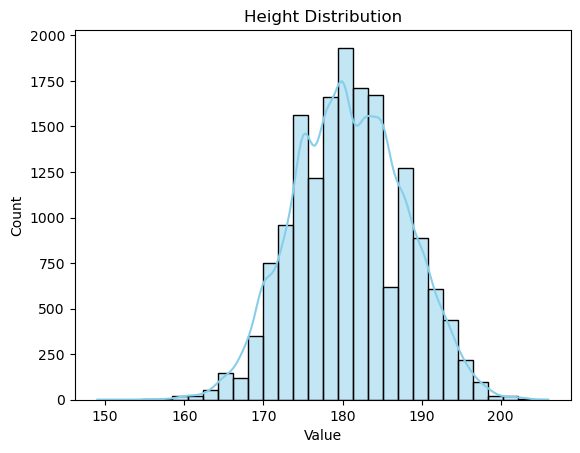

In [62]:
sns.histplot(df["Height"], kde=True, bins=30, color="skyblue")
plt.title("Height Distribution")
plt.xlabel("Value")
plt.show()

-------

- ### Exploring `Weight` Column

In [63]:
df["Weight"] = df["Weight"].str.replace("kg", "", regex=False).str.strip().astype(int)

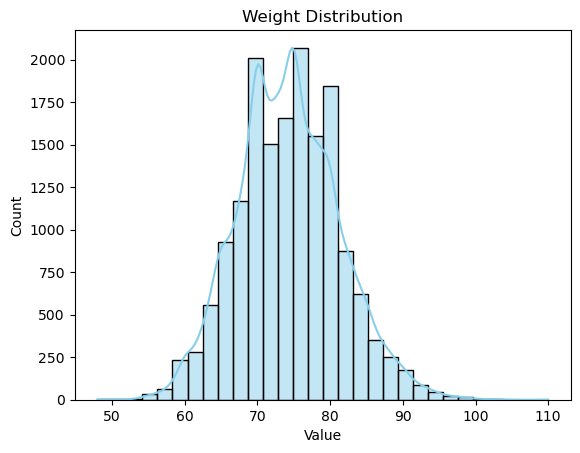

In [64]:
sns.histplot(df["Weight"], kde=True, bins=30, color="skyblue")
plt.title("Weight Distribution")
plt.xlabel("Value")
plt.show()

-----

- ### Handling `Release Clause` Column

In [65]:
df["Release Clause"].agg(['min','max'])

min        20000
max    366700000
Name: Release Clause, dtype: int64

**There is a big variance in this column**

------

- ### Handling `Kit Number` Column

In [66]:
np.sort(df["Kit Number"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

------

## Categorical and Numerical Columns

In [67]:
Num_col = df.select_dtypes(include=['number']).columns.tolist()
Cat_col= df.select_dtypes(include=['object', 'category']).columns.tolist()

**After understanding the data, Exploring each column and understanding what is inside it, it is time to get `insights`**

## Bivariate Analysis

- ### Get the top countries with the highest `average age`

In [68]:
Avg_Age_Countries = df.groupby("Nationality")["Age"].mean().sort_values(ascending=False).head(5)
Avg_Age_Countries

Nationality
Montserrat    32.0
Laos          31.0
Kuwait        31.0
Syria         28.5
Suriname      28.0
Name: Age, dtype: float64

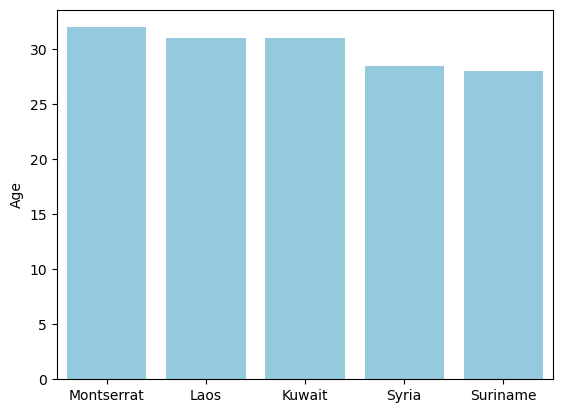

In [69]:
sns.barplot(Avg_Age_Countries,color = "skyblue")
plt.xlabel("");

---

- ### Relationship between Age and Overall

In [70]:
df.groupby("Age")["Overall"].mean().sort_values(ascending=False).head(5)

Age
44    79.000000
35    72.342342
34    71.854749
33    71.199052
39    71.181818
Name: Overall, dtype: float64

<Axes: xlabel='Age', ylabel='Overall'>

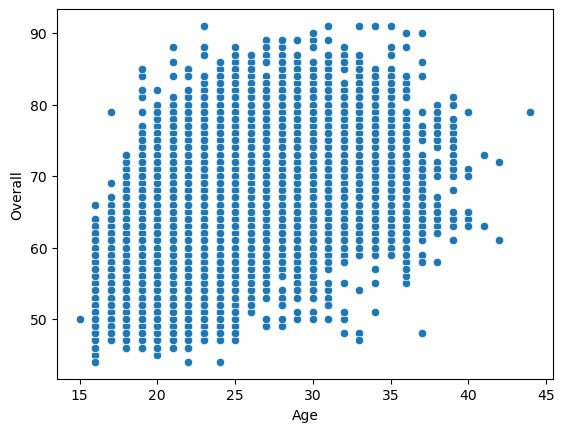

In [71]:
sns.scatterplot(x = "Age",y = "Overall", data = df)

In [72]:
df["Age"].corr(df["Overall"])

0.5988846014113467

**Overall Rating increases with age.**

---------

- ### Studying the age with other columns

In [73]:
results = []

for col in Num_col[3:-1]:
    top_5_age = (
        df.groupby("Age")[col]
        .mean()
        .sort_values(ascending=False)
        .head(5)
    )
    
    for age, value in top_5_age.items():
        results.append({"Column": col, "Age": age, "Mean": round(value,2)})

top_5_df_age = pd.DataFrame(results)

top_5_df_age = top_5_df_age.sort_values(["Column", "Mean"], ascending=[True, False])
top_5_df_age

Column  Age         Mean
35      Contract Valid Until   15      2025.00
36      Contract Valid Until   44      2024.00
37      Contract Valid Until   23      2023.66
38      Contract Valid Until   22      2023.61
39      Contract Valid Until   24      2023.60
40                    Height   44       192.00
41                    Height   15       190.00
42                    Height   40       188.57
43                    Height   41       186.00
44                    Height   42       185.00
20  International Reputation   44         4.00
21  International Reputation   36         1.87
22  International Reputation   39         1.82
23  International Reputation   35         1.79
24  International Reputation   38         1.78
0                  Potential   44        79.00
1                  Potential   35        72.34
2                  Potential   17        72.08
3                  Potential   15        72.00
4                  Potential   34        71.85
50            Release Clause   30  12294039.43
51            Release Clause   29  10465919.74
52            Release Clause   28  10265866.77
53            Release Clause   31   9646251.45
54            Release Clause   26   9410519.88
30               Skill Moves   34         2.66
31               Skill Moves   31         2.60
32               Skill Moves   33         2.60
33               Skill Moves   28         2.57
34               Skill Moves   30         2.54
15                   Special   34      1741.61
16                   Special   31      1731.62
17                   Special   33      1729.22
18                   Special   30      1706.85
19                   Special   32      1700.32
5                      Value   30   6582900.22
6                      Value   29   5642973.24
7                      Value   28   5516569.34
8                      Value   31   5205204.67
9                      Value   26   5031796.98
10                      Wage   30     21813.57
11                      Wage   31     21763.01
12                      Wage   33     21626.78
13                      Wage   34     20974.86
14                      Wage   28     18758.94
25                 Weak Foot   34         3.15
26                 Weak Foot   36         3.12
27                 Weak Foot   33         3.09
28                 Weak Foot   39         3.09
29                 Weak Foot   28         3.06
45                    Weight   44        92.00
46                    Weight   40        85.00
47                    Weight   42        83.00
48                    Weight   39        81.41
49                    Weight   38        79.09

- ### Scatterplot of age with other columns

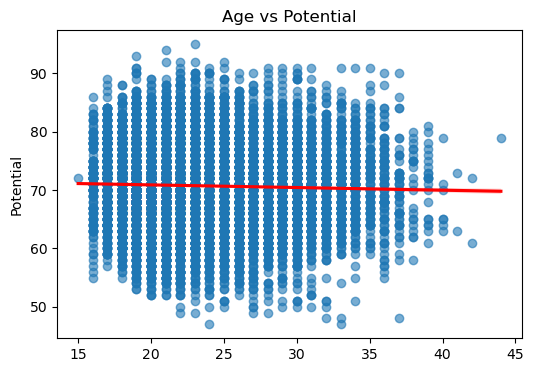

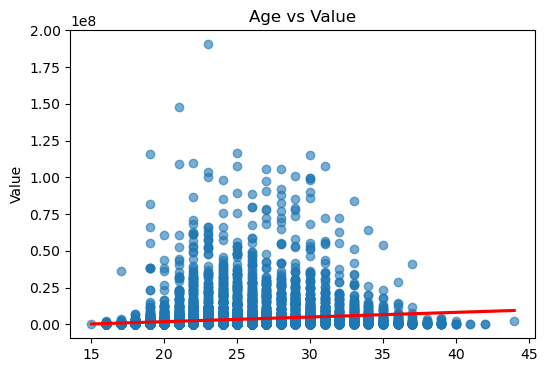

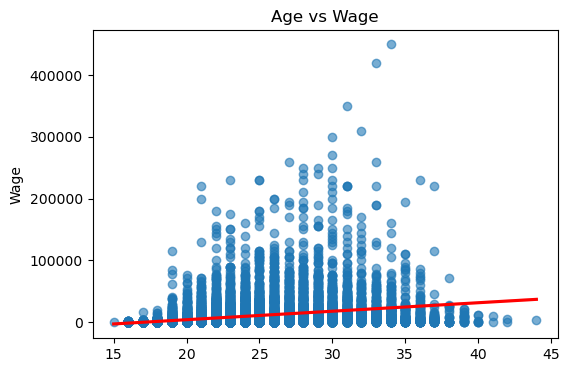

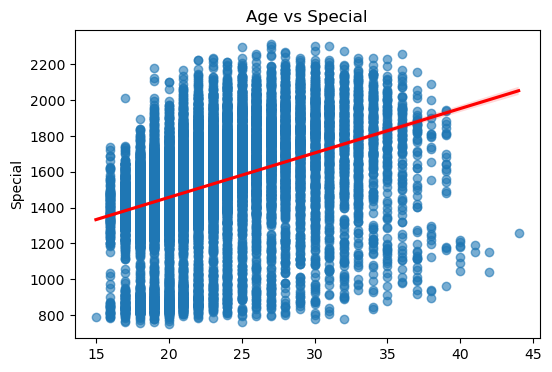

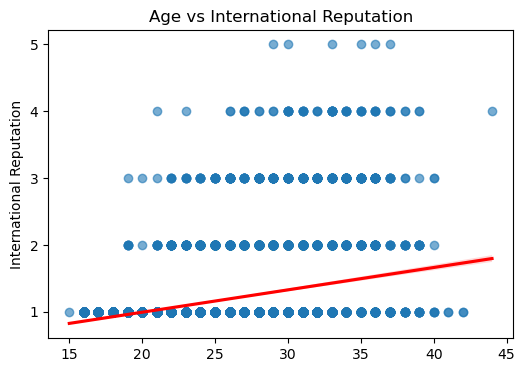

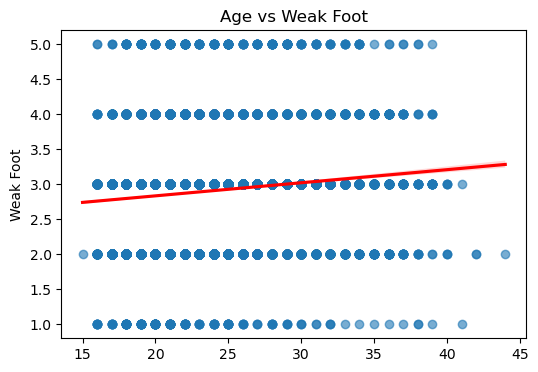

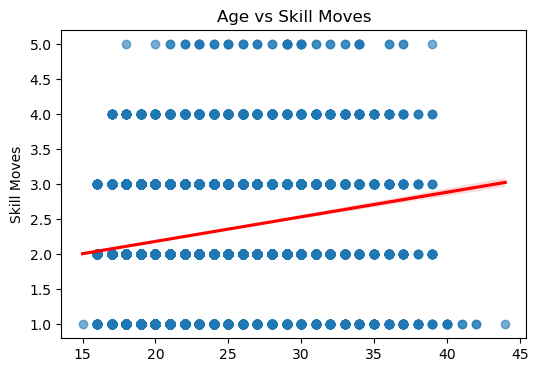

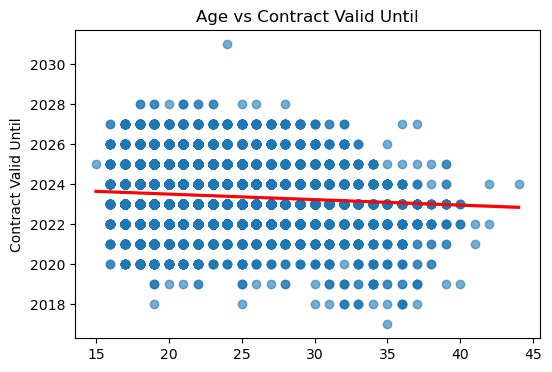

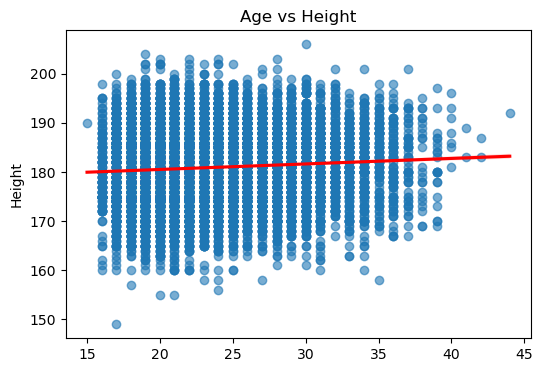

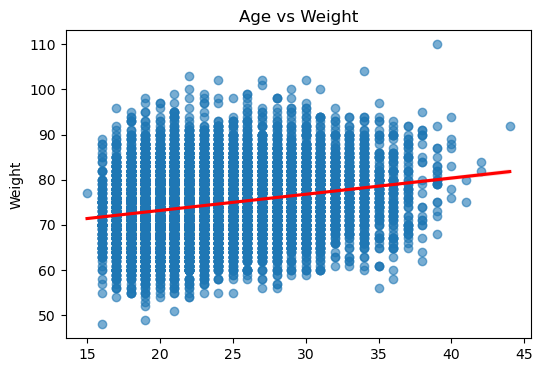

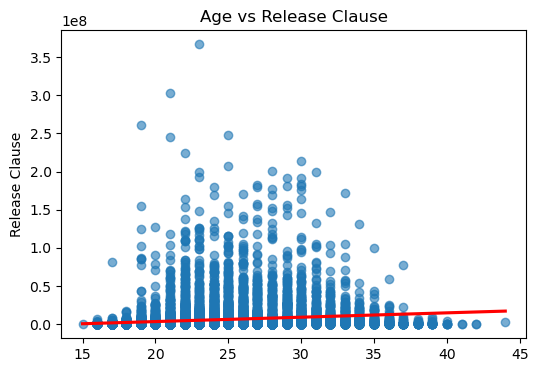

In [74]:
for col in Num_col[3:-1]:
    plt.figure(figsize=(6, 4))
    sns.regplot(x="Age", y=col, data=df, scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
    plt.title(f"Age vs {col}")
    plt.xlabel("")
    plt.ylabel(col)
    plt.show()

----

- ### The highest countries in terms of Overall and (Name,Club)

In [75]:
def top_per_nation(col):
    top_per_nation = df.loc[df.groupby("Nationality")[col].idxmax(), ["Nationality",col, "Name","Club","Kit Number"]]
    top_per_nation = top_per_nation.sort_values(col, ascending=False).head(5)
    return top_per_nation

In [76]:
top_per_nation("Overall")

Nationality  Overall           Name                 Club  Kit Number
3        Belgium       91    K.De Bruyne      Manchester City          17
75        France       91       K.Mbappé  Paris Saint-Germain           7
56     Argentina       91        L.Messi  Paris Saint-Germain          30
41        Poland       91  R.Lewandowski         FC Barcelona           9
192  Netherlands       90     V.van Dijk            Liverpool           4

------

- ### What is the average age by position or country?

In [77]:
df.groupby("Position")["Age"].mean()

Position
CAM    26.675824
CB     27.520408
CDM    25.819549
CF     27.727273
CM     24.954545
GK     27.515244
LAM    23.800000
LB     25.042484
LCB    26.191667
LCM    25.457746
LDM    26.165138
LF     25.724138
LM     24.444000
LS     25.634483
LW     24.764706
LWB    23.983607
RAM    26.333333
RB     25.276316
RCB    25.923645
RCM    25.301003
RDM    25.722689
RES    20.369200
RF     25.400000
RM     25.083969
RS     26.206612
RW     24.856061
RWB    25.373333
ST     26.803797
SUB    23.077694
Name: Age, dtype: float64

----

- ### Which positions tend to have the highest overall rating?

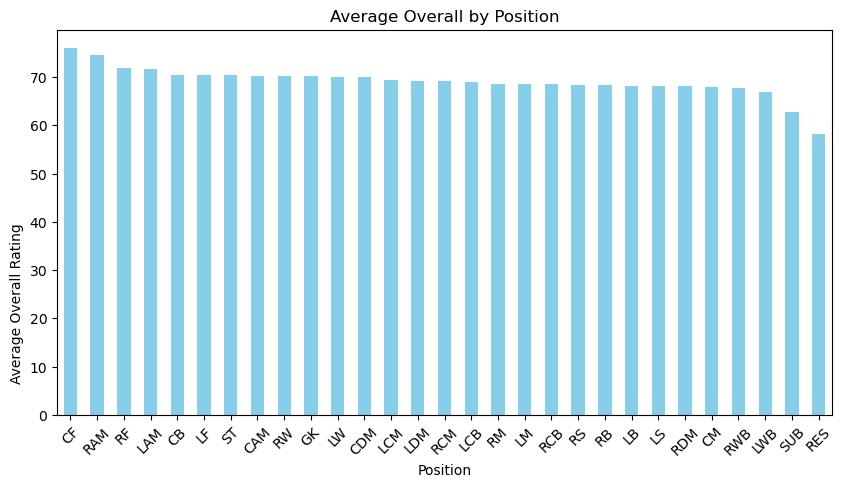

In [78]:
avg_overall_by_pos = df.groupby('Position')['Overall'].mean().sort_values(ascending=False)
avg_overall_by_pos.plot(kind='bar', figsize=(10,5),color = "skyblue")
plt.title('Average Overall by Position')
plt.ylabel('Average Overall Rating',ha= "right")
plt.xticks(rotation = 45)
plt.show()

**The attacking positions have the highest overall rating**

-----

- ### Best players in each position

In [79]:
best_per_position = (
    df.groupby("Position", group_keys=False).apply(lambda x: x.nlargest(1, "Overall")).reset_index(drop=True)
)

print(best_per_position[["Position", "Name", "Overall"]])

   Position                Name  Overall
0       CAM            T.Müller       87
1        CB          Marquinhos       88
2       CDM            Casemiro       89
3        CF           K.Benzema       91
4        CM           R.Pereyra       78
5        GK             M.Neuer       90
6       LAM            M.Moreno       76
7        LB        João Cancelo       88
8       LCB          V.van Dijk       90
9       LCM      Bernardo Silva       88
10      LDM        J.Bellingham       84
11       LF            P.Dybala       86
12       LM             K.Coman       86
13       LS          L.Martínez       86
14       LW           Neymar Jr       89
15      LWB          B.Chilwell       82
16      RAM    Nailton Padrenda       81
17       RB  T.Alexander-Arnold       87
18      RCB          Rúben Dias       88
19      RCM         K.De Bruyne       91
20      RDM           J.Kimmich       89
21      RES             P.Pogba       85
22       RF             A.Barák       81
23       RM     

-------

- ### The highest countries in terms of Potential and (Name,Club,Kit Number)

In [80]:
top_per_nation("Potential")

Nationality  Potential          Name                 Club  Kit Number
75       France         95      K.Mbappé  Paris Saint-Germain           7
180      Norway         94     E.Haaland      Manchester City           9
214       Spain         93         Pedri         FC Barcelona           8
317     England         92       P.Foden      Manchester City          47
849      Brazil         92  Vinícius Jr.       Real Madrid CF          20

-----

- ### The highest countries in terms of Value and (Name,Club,Kit Number)

In [81]:
top_per_nation("Value")

Nationality      Value       Name                 Club  Kit Number
75        France  190500000   K.Mbappé  Paris Saint-Germain           7
180       Norway  148000000  E.Haaland      Manchester City           9
17   Netherlands  116500000  F.de Jong         FC Barcelona          21
214        Spain  116000000      Pedri         FC Barcelona           8
25         Egypt  115500000    M.Salah            Liverpool          11

---

- ### The highest countries in terms of Special and (Name,Club,Kit Number)

In [82]:
top_per_nation("Special")

Nationality  Special             Name               Club  Kit Number
0     Germany     2312       L.Goretzka  FC Bayern München           8
1    Portugal     2305  Bruno Fernandes  Manchester United           8
2   Argentina     2303          M.Acuña         Sevilla FC          19
3     Belgium     2303      K.De Bruyne    Manchester City          17
4       Italy     2296        N.Barella              Inter          23

----

- ### The highest countries in terms of International Reputation and (Name,Club)

In [83]:
top_per_nation("International Reputation")

Nationality  International Reputation               Name  \
12893    Slovenia                       5.0            J.Oblak   
102        Brazil                       5.0          Neymar Jr   
9151      Germany                       5.0            M.Neuer   
56      Argentina                       5.0            L.Messi   
100      Portugal                       5.0  Cristiano Ronaldo   

                      Club  Kit Number  
12893   Atlético de Madrid          13  
102    Paris Saint-Germain          10  
9151     FC Bayern München           1  
56     Paris Saint-Germain          30  
100      Manchester United           7

----

- ### The highest countries in terms of Skill Moves and (Name,Club)

In [84]:
top_per_nation("Skill Moves")

Nationality  Skill Moves           Name                    Club  \
75                 France          5.0       K.Mbappé     Paris Saint-Germain   
62                 Brazil          5.0  Lucas Paquetá      Olympique Lyonnais   
3598               Gambia          5.0       M.Barrow  Jeonbuk Hyundai Motors   
328               Morocco          5.0       H.Ziyech                 Chelsea   
3276  Republic of Ireland          5.0      A.McGeady               Hibernian   

      Kit Number  
75             7  
62            10  
3598          11  
328           22  
3276          46

---

- ### Does high potential always mean high overall?

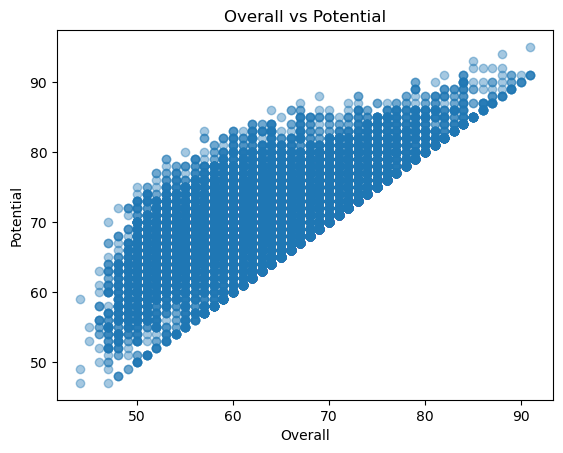

In [85]:
plt.scatter(df['Overall'], df['Potential'], alpha=.4)
plt.xlabel('Overall')
plt.ylabel('Potential')
plt.title('Overall vs Potential')
plt.show()

**Correlation between Overall and Potential**

In [86]:
Overall_Poten_Corr = df['Overall'].corr(df['Potential'])
print(f"Correlation: {Overall_Poten_Corr:.2f}")

Correlation: 0.71


**Check players with same overall as potential**

In [87]:
same_rating_count = (df['Overall'] == df['Potential']).sum()
print(f"Players at max potential already: {same_rating_count}")

Players at max potential already: 2983


**yes `high potential` mean `high overall`**

------

- ### Club comparisons (max ratings by team)

In [88]:
df.loc[df.groupby("Club")["Overall"].idxmax(), ["Club", "Name", "Overall"]].sort_values("Overall", ascending=False).head(6)


Club               Name  Overall
41          FC Barcelona      R.Lewandowski       91
124       Real Madrid CF          K.Benzema       91
3        Manchester City        K.De Bruyne       91
56   Paris Saint-Germain            L.Messi       91
25             Liverpool            M.Salah       90
100    Manchester United  Cristiano Ronaldo       90

- ### Are left-footed players rarer than right-footed?

Preferred Foot
Right    12661
Left      3703
Name: count, dtype: int64
Preferred Foot
Right    77.371058
Left     22.628942
Name: proportion, dtype: float64


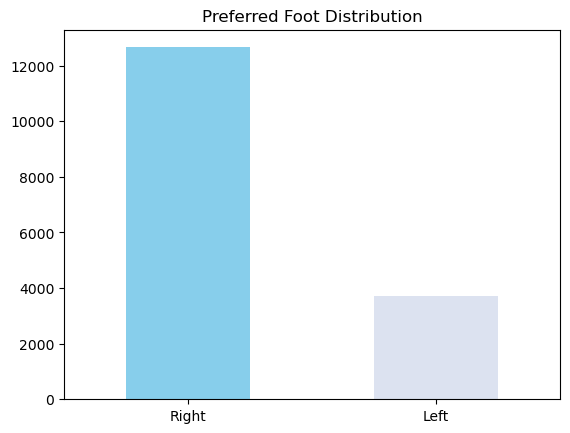

In [89]:
foot_counts = df['Preferred Foot'].value_counts()
print(foot_counts)

percentages = df['Preferred Foot'].value_counts(normalize=True) * 100
print(percentages)

colors  = ["skyblue","#DCE2F0"]
foot_counts.plot(kind='bar', color=colors)
plt.title('Preferred Foot Distribution')
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0)
plt.show()

-----

- ### Are left-footed players have `rating more` than right-footed?

In [90]:
avg_overall_foot = df.groupby("Preferred Foot")["Overall"].mean()
avg_overall_foot

Preferred Foot
Left     64.029166
Right    62.764790
Name: Overall, dtype: float64

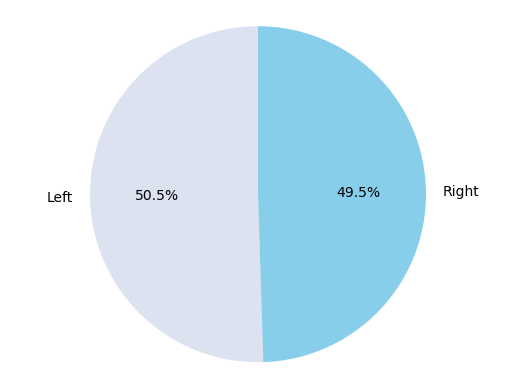

In [91]:
plt.pie(
    avg_overall_foot, 
    labels=avg_overall_foot.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=["#DCE2F0","skyblue"]
)

plt.title("")
plt.axis('equal') 
plt.show()

------

## Multivariate Analysis

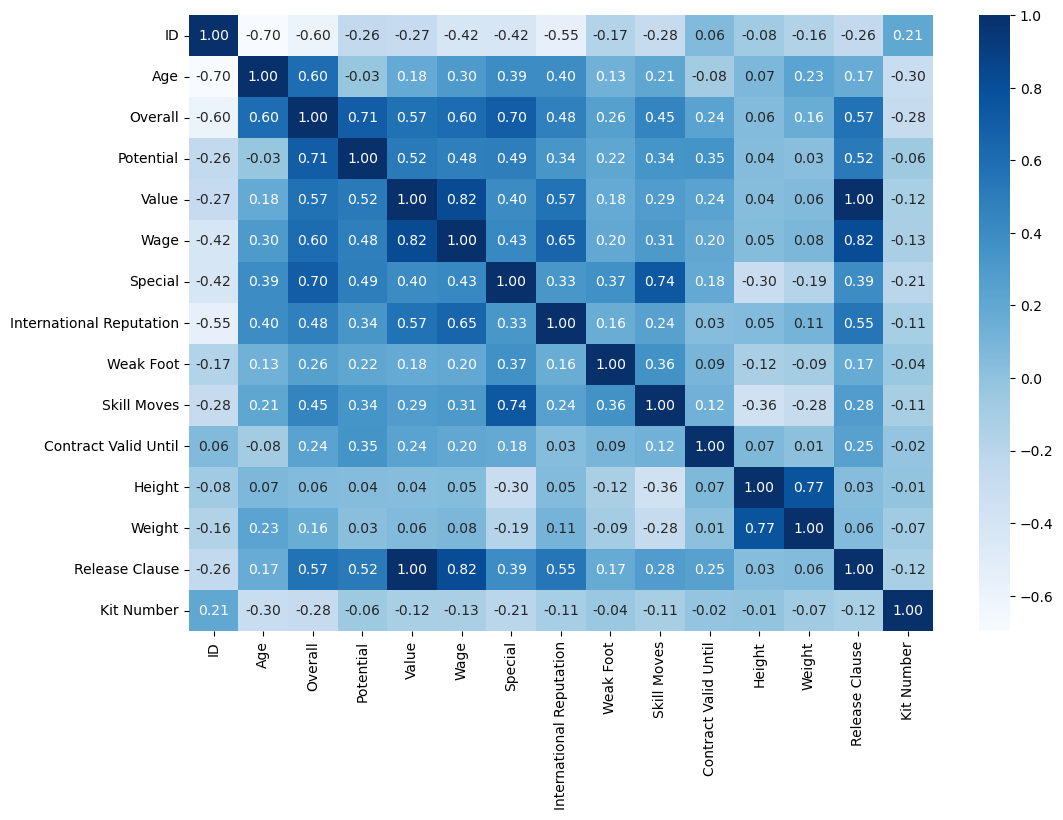

In [92]:
plt.figure(figsize=(12,8))
sns.heatmap(df[Num_col].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("")
plt.show()

## Key Insights

1. **Player Age Trends**
   - Older players generally have higher **Overall ratings** and better **International Reputation**.

2. **Overall Rating Drivers**
   - **Overall** increases with higher:
     - Release Clause
     - Skill Moves
     - International Reputation
     - Special score
     - Wage
     - Market Value
     - Potential

3. **Skill Relationship**
   - Players with higher **Special** scores tend to have more **Skill Moves**.

4. **Physical Attributes**
   - **Height** and **Weight** show a positive correlation — taller players are generally heavier.
 increases.


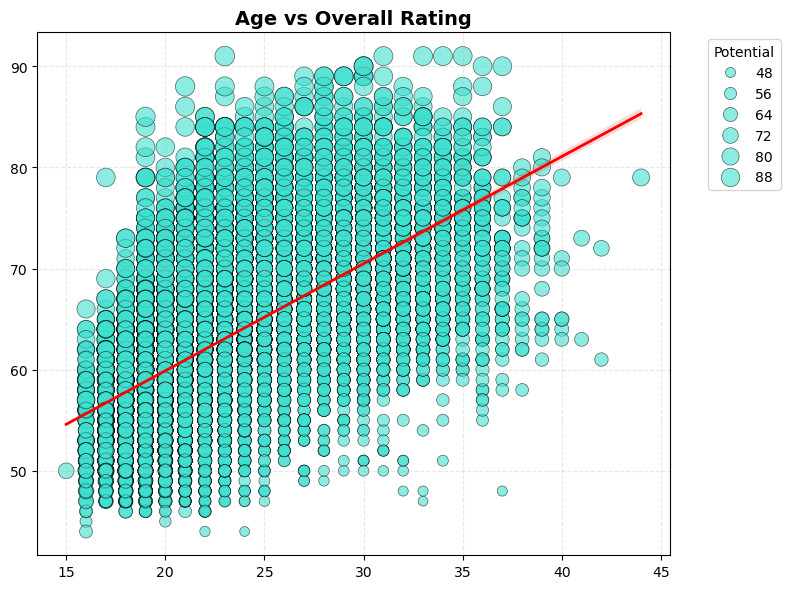

In [93]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Age", 
    y="Overall", 
    size="Potential",
    sizes=(50, 200),
    color="turquoise",
    alpha=0.6,
    edgecolor="black",
    linewidth=0.5,
    data=df
)

sns.regplot(
    x="Age",
    y="Overall",
    data=df,
    scatter=False, 
    color="red",
    line_kws={"linewidth": 2}
)


plt.title("Age vs Overall Rating", fontsize=14, fontweight="bold")
plt.xlabel("")
plt.ylabel("")

plt.legend(title="Potential", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

------

- ### Release Clause Analysis by Age and Rating

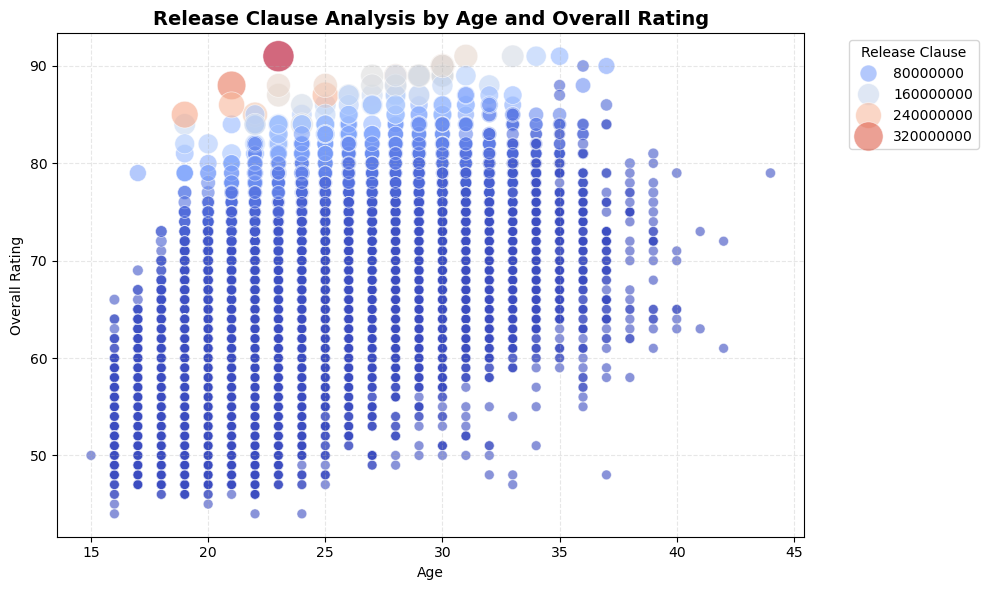

In [94]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="Age",
    y="Overall",
    size="Release Clause",
    sizes=(50, 500),
    alpha=0.6,
    hue="Release Clause",
    palette="coolwarm",
    data=df
)

plt.title("Release Clause Analysis by Age and Overall Rating", fontsize=14, fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Overall Rating")
plt.legend(title="Release Clause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

# Detecting Outliers

- ## Boxplots and Stripplots

In [95]:
execluded = ["ID","International Reputation","Weak Foot","Skill Moves","Kit Number","Weak Foot"]
filtered_Num_Col = [i for i in Num_col if i not in execluded]
filtered_Num_Col

['Age',
 'Overall',
 'Potential',
 'Value',
 'Wage',
 'Special',
 'Contract Valid Until',
 'Height',
 'Weight',
 'Release Clause']

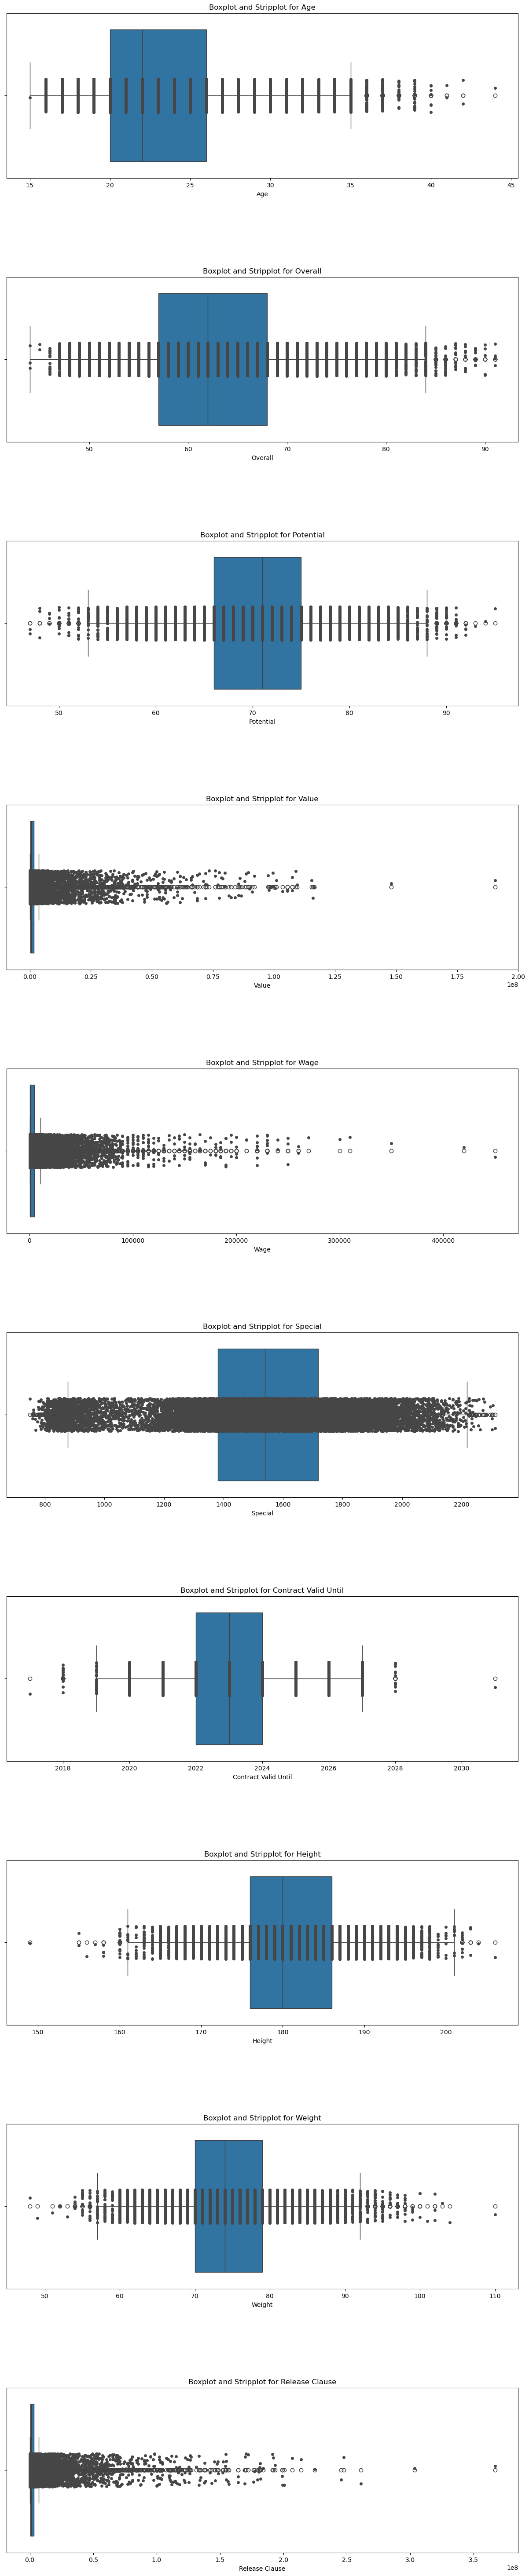

In [96]:
fig,axes = plt.subplots(len(filtered_Num_Col),1,figsize = (15,5*len(Num_col)))
fig.subplots_adjust(hspace=.6)
axes.flatten()
for i, col in enumerate(filtered_Num_Col):
    sns.boxplot(x=col, data=df, ax=axes[i])
    sns.stripplot(x=col, data=df, color="#474646", ax=axes[i])
    axes[i].set_title(f"Boxplot and Stripplot for {col}")
    axes[i].set_xlabel(col)

**As shown in boxplots there are many outliers**

In [97]:
outlier_data = {}
for col in filtered_Num_Col:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound) ]
    num_outliers = outliers.shape[0]
    total = df[col].count()
    percentage_outliers = round(((num_outliers / total) * 100) , 2)
    outlier_data[col] = percentage_outliers
    print(f"Number of outliers for \033[1m{col} ({round(lower_bound,2)} , {round(upper_bound,2)}) with skeweness {round(df[col].skew(),2)}\033[0m is \033[1m{num_outliers}\033[0m and percentage is \033[1m{percentage_outliers}\033[0m")

Number of outliers for Age (11.0 , 35.0) with skeweness 0.95 is 205 and percentage is 1.25
Number of outliers for Overall (40.5 , 84.5) with skeweness 0.41 is 89 and percentage is 0.54
Number of outliers for Potential (52.5 , 88.5) with skeweness 0.05 is 113 and percentage is 0.69
Number of outliers for Value (-1737500.0 , 3762500.0) with skeweness 7.62 is 2038 and percentage is 12.45
Number of outliers for Wage (-6125.0 , 11675.0) with skeweness 6.68 is 2580 and percentage is 15.77
Number of outliers for Special (875.5 , 2223.5) with skeweness -0.41 is 598 and percentage is 3.65
Number of outliers for Contract Valid Until (2019.0 , 2027.0) with skeweness 0.19 is 34 and percentage is 0.21
Number of outliers for Height (161.0 , 201.0) with skeweness 0.01 is 43 and percentage is 0.26
Number of outliers for Weight (56.5 , 92.5) with skeweness 0.24 is 170 and percentage is 1.04
Number of outliers for Release Clause (-3315000.0 , 7109000.0) with skeweness 7.71 is 2092 and percentage is 12.7

**Negative Q1 because columns have High skewness(as right making Q3 is very high then IQR is high) , so we can"t remove outliers with `IQR`**<br>
**There is a sol is to use `max(lower_bound, 0)` but it can lead to `bias` in analytics**

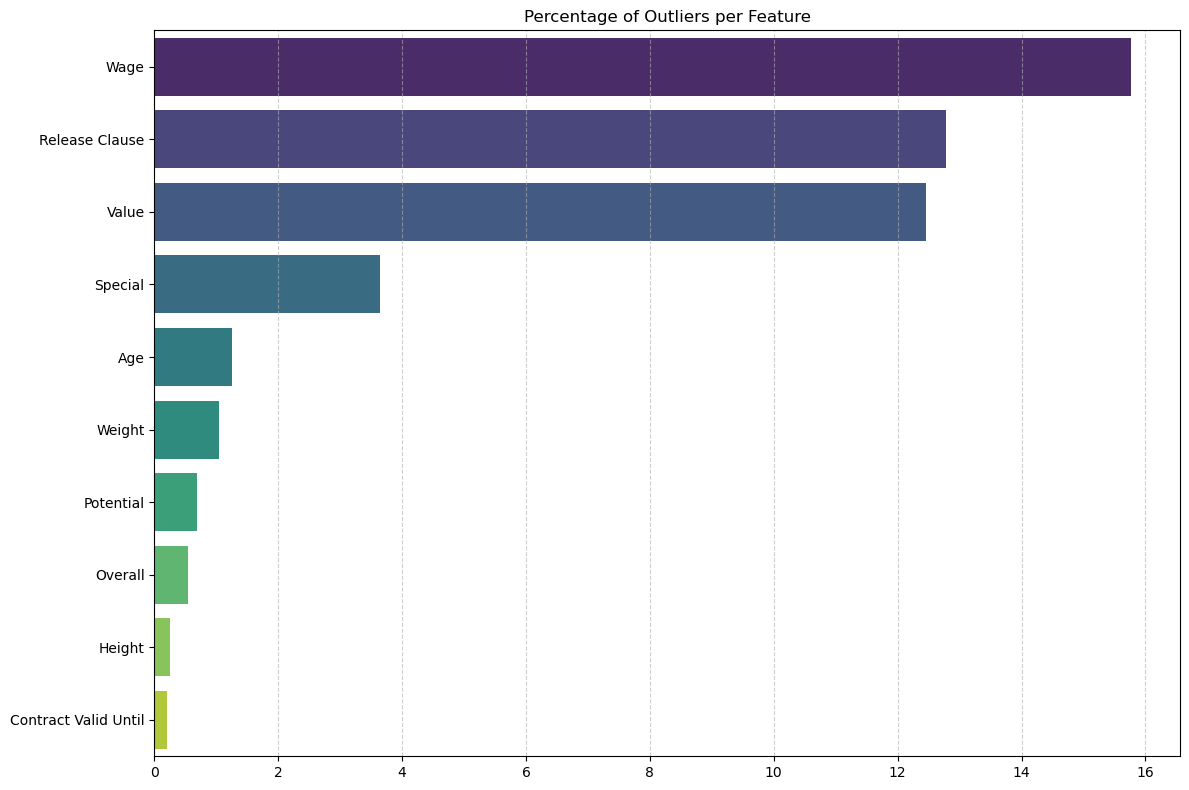

In [98]:
outlier_df = pd.DataFrame(list(outlier_data.items()), columns=["Feature", "Outlier_Percentage"])
outlier_df = outlier_df.sort_values(by="Outlier_Percentage", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=outlier_df, x="Outlier_Percentage", y="Feature", palette="viridis")
plt.title("Percentage of Outliers per Feature")
plt.xlabel("")
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## Handling Outliers

- **Wage**, **Release Clause**, **Value** and **Special** show natural variation.  
- Their extreme values are **valid outliers** (they represent real players, not errors).  
- These features will be **kept in the dataset**.  
- I will use **robust models** that can effectively handle outliers.


----------

# Feature Engineering

- ## Create an age group column from an existing age column

In [99]:
bins = [15, 20, 25, 30, 35, 40, 45]
labels = ["Teen", "Early 20s", "Mid 20s", "Early 30s", "Late 30s", "Veteran"]

df["Age_group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

In [100]:
df["Age_group"].unique()

['Mid 20s', 'Early 30s', 'Late 30s', 'Early 20s', 'Teen', 'Veteran']
Categories (6, object): ['Teen' < 'Early 20s' < 'Mid 20s' < 'Early 30s' < 'Late 30s' < 'Veteran']

### Age Groups (Football Players)

- **15–19** → Youth  
- **20–24** → Young Player  
- **25–29** → Prime  
- **30–34** → Experienced  
- **35–44** → Veteran  


-----

- ### classify Players into `Attack, Midfield, Defense, Goalkeeper` categories.

In [101]:
positions = ['SUB', 'LCM', 'LB', 'RCM', 'RDM', 'LCB', 'RB', 'LM', 'LS', 'RWB',
             'CDM', 'RW', 'RM', 'LF', 'ST', 'CAM', 'LDM', 'RES', 'LW', 'CF',
             'RF', 'RCB', 'RS', 'LWB', 'CM', 'CB', 'RAM', 'LAM', 'GK']

In [102]:
position_map = {
    "Attack": ["ST","CF","LF","RF","LS","RS","LW","RW"],
    "Midfield": ["CAM","CM","LCM","RCM","CDM","LDM","RDM","LM","RM","LAM","RAM"],
    "Defense": ["CB","LCB","RCB","LB","RB","LWB","RWB"],
    "Goalkeeper": ["GK"],
    "Other": ["SUB","RES"]
}

In [103]:
reverse_map = {pos: group for group, pos_list in position_map.items() for pos in pos_list} # Reverse map for lookup

In [104]:
df["Role"] = df["Position"].map(reverse_map)

In [105]:
df["Role"].unique()

array(['Other', 'Midfield', 'Defense', 'Attack', 'Goalkeeper'],
      dtype=object)

------

- ## Create groups for the `"overall"` rating column

In [106]:
bins = [40, 60, 70, 80, 90, 100]  
labels = ["Low", "Average", "Good", "Very Good", "World Class"]

df["Overall_group"] = pd.cut(df["Overall"], bins=bins, labels=labels, right=False)


In [107]:
df["Overall_group"].unique()

['Very Good', 'World Class', 'Good', 'Average', 'Low']
Categories (5, object): ['Low' < 'Average' < 'Good' < 'Very Good' < 'World Class']

### Overall Rating Groups

- **40–59** → Low  
- **60–69** → Average  
- **70–79** → Good  
- **80–89** → Very Good  
- **90+**   → World Class  


----

- ## how many years a player has been at the club

In [108]:
df["Contract_years"] = df["Contract Valid Until"] - df["Joined"].dt.year

In [109]:
correlation = df["Overall"].corr(df["Contract_years"])
correlation

0.3572851769114677

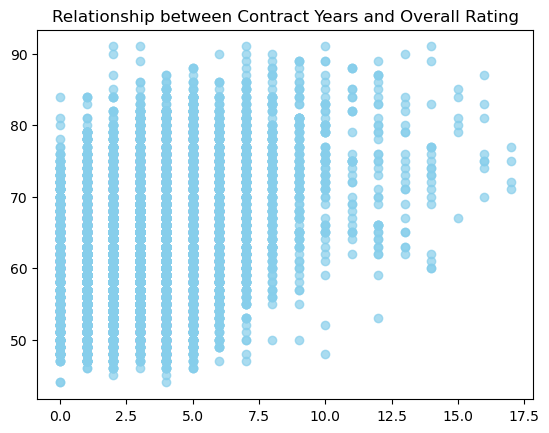

In [110]:
plt.scatter(df["Contract_years"], df["Overall"], alpha=.7,color = "skyblue")
plt.xlabel("")
plt.ylabel("")
plt.title("Relationship between Contract Years and Overall Rating")
plt.show()

### Correlation Interpretation (Overall vs. Time at Club)

- **Correlation value: 0.357**

- This indicates a **weak-to-moderate positive correlation**.

- Meaning:
  - Players who stay longer **tend to** have slightly higher overall.  
  - But it’s **not a strong trend** — many players don’t follow this pattern.  

- **Football logic**:  
  Some players improve with time (training, adaptation), while others may stagnate or even decline.


----

- ## calculate BMI (Body Mass Index) and use it to estimate a fitness level.

### Body Mass Index (BMI) Formula

The formula to calculate BMI is:

$$
BMI = \frac{weight \ (kg)}{(height \ (m))^2}
$$


In [111]:
df["Height"] = df["Height"] / 100 # convert it to m

In [112]:
df["BMI"] = df["Weight"] / (df["Height"] ** 2) # Create BMI

In [113]:
df["BMI"].agg(["min","max"])

min    15.618492
max    34.717839
Name: BMI, dtype: float64

In [114]:
df["BMI"] = df["BMI"].astype(int) # convert it to integer

In [115]:
def fitness_level(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Fit"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

In [116]:
df["Fitness_level"] = df["BMI"].apply(fitness_level)

In [117]:
df["Fitness_level"].unique()

array(['Fit', 'Overweight', 'Underweight', 'Obese'], dtype=object)

---

- ## Map every country in this list into a region column

In [118]:
country_to_region = {
    # Europe
    'Germany': 'Europe', 'Portugal': 'Europe', 'Belgium': 'Europe',
    'Italy': 'Europe', 'Austria': 'Europe', 'Croatia': 'Europe',
    'Serbia': 'Europe', 'Spain': 'Europe', 'Netherlands': 'Europe',
    'England': 'Europe', 'France': 'Europe', 'Ukraine': 'Europe',
    'Poland': 'Europe', 'Denmark': 'Europe', 'Turkey': 'Europe',
    'Scotland': 'Europe', 'Romania': 'Europe', 'Czech Republic': 'Europe',
    'Bosnia and Herzegovina': 'Europe', 'Slovakia': 'Europe',
    'Armenia': 'Europe', 'Norway': 'Europe', 'Switzerland': 'Europe',
    'Russia': 'Europe', 'Malta': 'Europe', 'Montenegro': 'Europe',
    'Iceland': 'Europe', 'Slovenia': 'Europe', 'Israel': 'Europe',
    'Sweden': 'Europe', 'Greece': 'Europe', 'Republic of Ireland': 'Europe',
    'Northern Ireland': 'Europe', 'Wales': 'Europe', 'Kosovo': 'Europe',
    'Finland': 'Europe', 'Albania': 'Europe', 'Luxembourg': 'Europe',
    'Hungary': 'Europe', 'Kazakhstan': 'Europe', 'Cyprus': 'Europe',
    'Liechtenstein': 'Europe', 'Georgia': 'Europe', 'Bulgaria': 'Europe',
    'Moldova': 'Europe', 'Lithuania': 'Europe', 'Estonia': 'Europe',
    'Belarus': 'Europe', 'Faroe Islands': 'Europe', 'Gibraltar': 'Europe',
    'Latvia': 'Europe', 'Azerbaijan': 'Europe', 'Andorra': 'Europe',
    'San Marino': 'Europe',

    # South America
    'Argentina': 'South America', 'Colombia': 'South America',
    'Uruguay': 'South America', 'Brazil': 'South America',
    'Chile': 'South America', 'Peru': 'South America',
    'Ecuador': 'South America', 'Paraguay': 'South America',
    'Venezuela': 'South America', 'Bolivia': 'South America',

    # North America & Caribbean
    'United States': 'North America', 'Mexico': 'North America',
    'Canada': 'North America', 'Jamaica': 'Caribbean',
    'Costa Rica': 'North America', 'Honduras': 'North America',
    'Curacao': 'Caribbean', 'Trinidad and Tobago': 'Caribbean',
    'Dominican Republic': 'Caribbean', 'Haiti': 'Caribbean',
    'Panama': 'North America', 'Antigua and Barbuda': 'Caribbean',
    'Cuba': 'Caribbean', 'Grenada': 'Caribbean', 'Saint Lucia': 'Caribbean',
    'Montserrat': 'Caribbean', 'Puerto Rico': 'Caribbean',
    'Guatemala': 'North America', 'El Salvador': 'North America',
    'Saint Kitts and Nevis': 'Caribbean',

    # Africa
    'Morocco': 'Africa', 'Egypt': 'Africa', 'Algeria': 'Africa',
    "Côte d'Ivoire": 'Africa', 'Senegal': 'Africa',
    'Central African Republic': 'Africa', 'Nigeria': 'Africa',
    'Cameroon': 'Africa', 'Zambia': 'Africa', 'Guinea': 'Africa',
    'Tunisia': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa',
    'Comoros': 'Africa', 'Gabon': 'Africa', 'Liberia': 'Africa',
    'Ghana': 'Africa', 'Mali': 'Africa', 'Congo DR': 'Africa',
    'Mozambique': 'Africa', 'Cape Verde Islands': 'Africa',
    'Madagascar': 'Africa', 'Burkina Faso': 'Africa',
    'Zimbabwe': 'Africa', 'Equatorial Guinea': 'Africa',
    'Libya': 'Africa', 'Togo': 'Africa', 'Burundi': 'Africa',
    'Gambia': 'Africa', 'Congo': 'Africa', 'Uganda': 'Africa',
    'Sierra Leone': 'Africa', 'Mauritania': 'Africa',
    'Namibia': 'Africa', 'Niger': 'Africa', 'Sudan': 'Africa',
    'Tanzania': 'Africa', 'South Africa': 'Africa', 'Ethiopia': 'Africa',
    'Malawi': 'Africa', 'South Sudan': 'Africa',

    # Asia & Middle East
    'Korea Republic': 'Asia', 'Japan': 'Asia', 'China PR': 'Asia',
    'Saudi Arabia': 'Middle East', 'Iran': 'Middle East',
    'Syria': 'Middle East', 'Kuwait': 'Middle East',
    'Jordan': 'Middle East', 'India': 'Asia', 'Vietnam': 'Asia',
    'Korea DPR': 'Asia', 'Uzbekistan': 'Asia', 'Thailand': 'Asia',
    'United Arab Emirates': 'Middle East', 'Philippines': 'Asia',
    'Malaysia': 'Asia', 'Iraq': 'Middle East', 'Afghanistan': 'Asia',
    'Laos': 'Asia', 'Bhutan': 'Asia', 'Hong Kong': 'Asia',
    'Singapore': 'Asia', 'Lebanon': 'Middle East', 'Indonesia': 'Asia',

    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania',
    'Papua New Guinea': 'Oceania',
    'North Macedonia': 'Europe',
    'Guinea Bissau': 'Africa',
    'Suriname': 'South America',
    'Kenya': 'Africa',
    'Guyana': 'South America',
    'Palestine': 'Middle East',
    'Chinese Taipei': 'Asia',
}


In [119]:
df["Region"] = df["Nationality"].map(country_to_region)


In [120]:
df.isna().sum()

ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Flag                        0
Overall                     0
Potential                   0
Club                        0
Club Logo                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
Kit Number                  0
Age_group                   0
Role                        0
Overall_group               0
Contract_years              0
BMI                         0
Fitness_level               0
Region    

-------

- ## Split that "Work Rate" column into two separate columns

In [121]:
df[["Attacking_WorkRate", "Defensive_WorkRate"]] = df["Work Rate"].str.split("/", expand=True)
df["Attacking_WorkRate"] = df["Attacking_WorkRate"].str.strip()
df["Defensive_WorkRate"] = df["Defensive_WorkRate"].str.strip()

---

# Updating Categorical and Numerical lists

In [122]:
Cat_col += ["Attacking_WorkRate", "Defensive_WorkRate", "Region", "Fitness_level", 
            "BMI", "Contract_years", "Age_group", "Role", "Overall_group"]
Num_col+=["Contract_years"]

- # Which Position has higher overall and higher Value ?

In [123]:
df.groupby("Role")[["Overall","Value"]].max()

Overall      Value
Role                          
Attack           91  190500000
Defense          90  107500000
Goalkeeper       90  103500000
Midfield         91  116500000
Other            88   91000000

**`Attack` and `Midfield` have the highest `Overall`**

-------

- # Find the region with the highest average Value and the region with the highest Overall.

In [124]:
df.groupby("Region").agg(
    Name=("Name", "first"),
    Value_mean=("Value", "mean"),
    Overall_max=("Overall", "max")
).round(2)

Name  Value_mean  Overall_max
Region                                              
Africa             A.Hakimi  3573858.64           90
Asia                  H.Son   707915.25           89
Caribbean         M.Antonio  1596397.04           79
Europe           L.Goretzka  3133919.10           91
Middle East    S.Al Dawsari   666480.69           81
North America    W.McKennie  1725357.14           88
Oceania              A.Mooy   628429.20           78
South America       M.Acuña  2600424.32           91

In [125]:
len(df[df["Region"] == "Africa"])

1047

In [126]:
len(df[df["Region"] == "Europe"])

9358

**Africa contain players with the highest values although it contain less players than Europe**

----

In [127]:
highest_players = df.loc[df.groupby("Region")["Overall"].idxmax(), ["Region", "Name", "Value", "Overall"]]
highest_players

Region         Name      Value  Overall
25            Africa      M.Salah  115500000       90
135             Asia        H.Son  101000000       89
240        Caribbean    M.Antonio   14000000       79
3             Europe  K.De Bruyne  107500000       91
1079     Middle East     M.Taremi   25500000       81
12214  North America      K.Navas   10000000       88
13874        Oceania       M.Ryan    9500000       78
56     South America      L.Messi   54000000       91

----

# Pipeline

In [128]:
to_encoded = ["Preferred Foot","Attacking_WorkRate","Defensive_WorkRate","Fitness_level","Position","Role"]

to_scaled = ["Potential",'Value','Wage','Special','International Reputation','Weak Foot',
            'Skill Moves','Height','Weight',"Release Clause","Contract_years"]

In [129]:
label_encoded = ["Preferred Foot","Attacking_WorkRate","Defensive_WorkRate","Fitness_level"]
OHE_encoded = ["Position","Role"]

# Selecting Features

In [130]:
X = df.drop(columns=["Overall",'ID', 'Name',"Photo","Nationality","Flag","Club Logo","Work Rate","Real Face",'Joined', 'Contract Valid Until',"Kit Number","Overall_group","BMI","Region","Age_group"], axis=1)
y = df["Overall"]

In [131]:
X.shape,y.shape

((16364, 20), (16364,))

# Applying Pipeline

In [132]:
preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), label_encoded),
        ("ohe", OneHotEncoder(handle_unknown="ignore"), OHE_encoded),
        ("scaler", StandardScaler(), to_scaled)
    ]
)

# Splitting Data

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ML models

In [134]:
Results = []

- ## Decision Tree

In [135]:
DS = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(criterion="squared_error",max_depth=5,random_state=42)) 
])

In [138]:
DS.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Preferred Foot',
                                                   'Attacking_WorkRate',
                                                   'Defensive_WorkRate',
                                                   'Fitness_level']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Position', 'Role']),
                                                 ('scaler', StandardScaler(),
                                                  ['Potential', 'Value', 'Wage',
                                                   'Special',
                                                   'International Reputation',
                                                   'Weak Foot', 'Skill Moves',
                                                   'Height', 'Weight',
                                                   'Release Clause',
                                                   'Contract_years'])])),
                ('model', DecisionTreeRegressor(max_depth=5, random_state=42))])

In [139]:
y_pred = DS.predict(X_test)

In [143]:
DS_R2 = DS.score(X_test, y_test)
DS_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Train R²:", DS.score(X_train, y_train))
print("Test R²:", DS_R2)
print("RMSE",DS_RMSE)

Train R²: 0.9224867820961488
Test R²: 0.9178017175109732
RMSE 2.3017812955862915


In [145]:
Results.append({"model": "DecisionTree" , "R2":DS_R2,"RMSE":DS_RMSE})

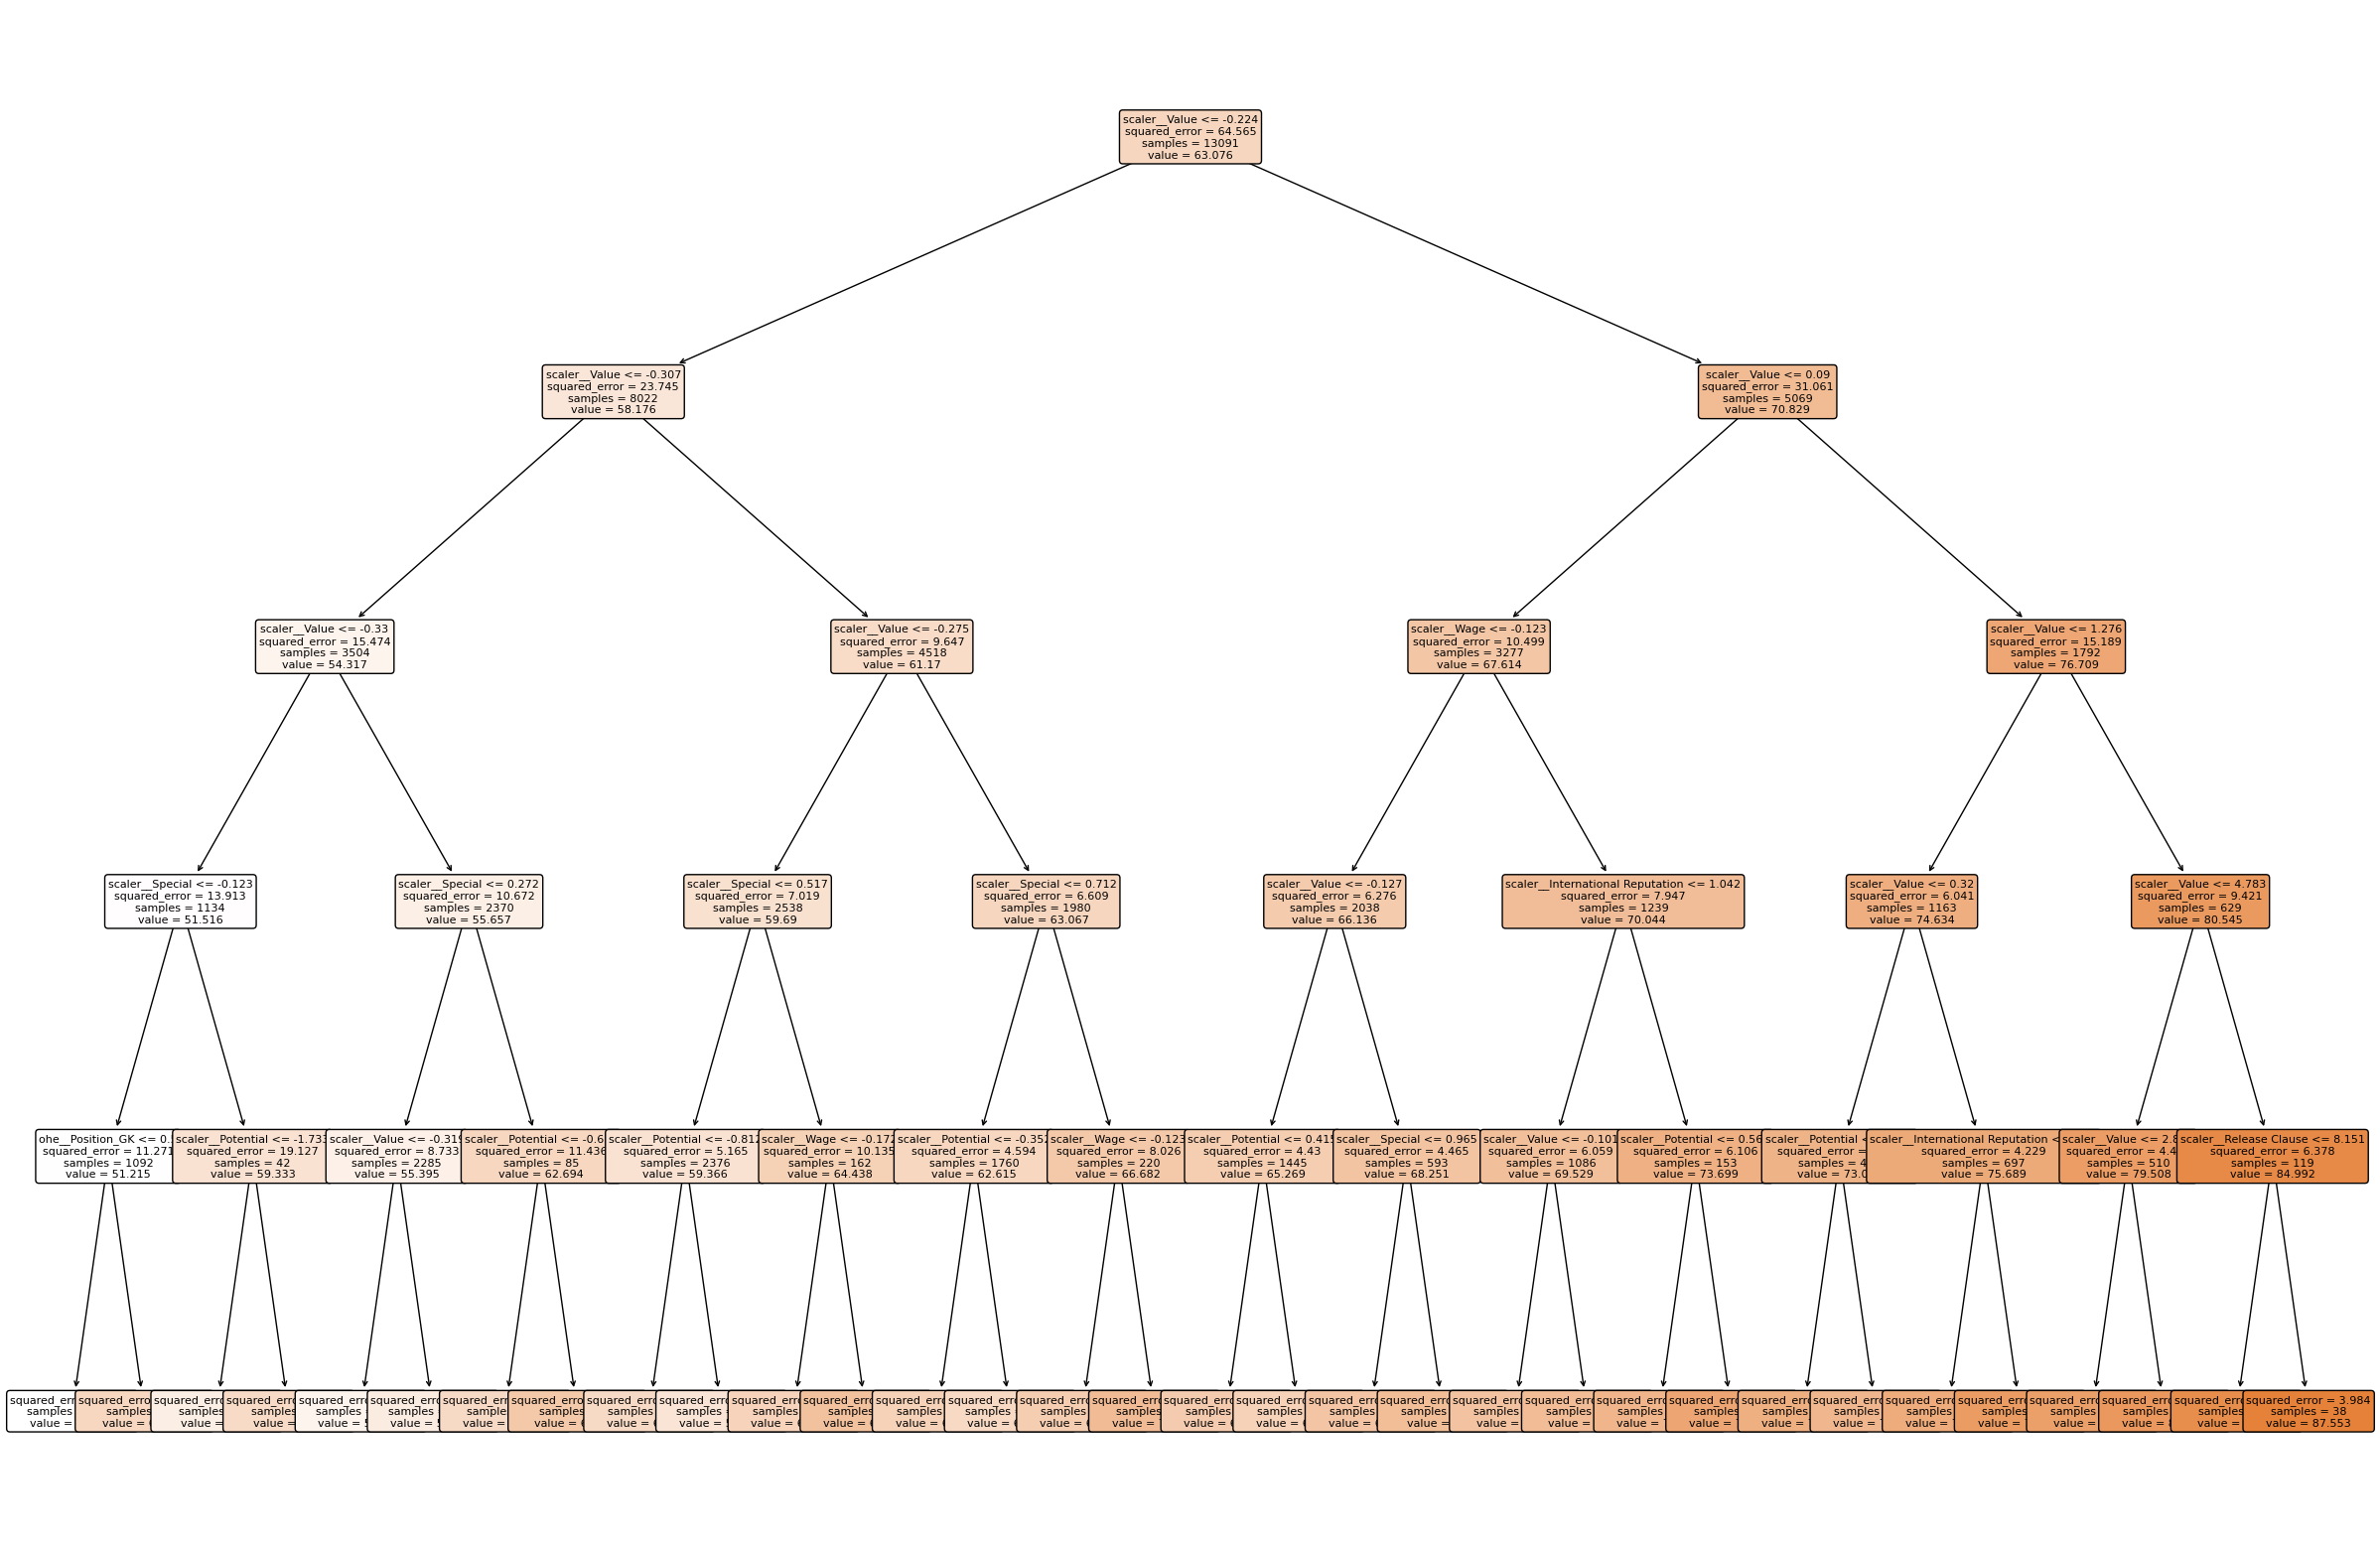

In [137]:
feature_names = DS.named_steps["preprocessor"].get_feature_names_out()

dt_model = DS.named_steps["model"]

# Plot the tree
plt.figure(figsize=(30,20))
tree.plot_tree(
    dt_model,
    feature_names=feature_names,
    filled=True,
    fontsize=8,
    rounded=True
)
plt.show()

- ## Random Forest

In [157]:
rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42))
])

In [158]:
rf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Preferred Foot',
                                                   'Attacking_WorkRate',
                                                   'Defensive_WorkRate',
                                                   'Fitness_level']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Position', 'Role']),
                                                 ('scaler', StandardScaler(),
                                                  ['Potential', 'Value', 'Wage',
                                                   'Special',
                                                   'International Reputation',
                                                   'Weak Foot', 'Skill Moves',
                                                   'Height', 'Weight',
                                                   'Release Clause',
                                                   'Contract_years'])])),
                ('model',
                 RandomForestRegressor(max_depth=10, n_estimators=200,
                                       random_state=42))])

In [159]:
y_pred = rf.predict(X_test)

In [163]:
print("Random Forest Train R²:", rf.score(X_train, y_train))
RF_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RF_R2 = rf.score(X_test, y_test)

print("Random Forest Test R²:", RF_R2)
print("Random Forest RMSE", RF_RMSE)

Random Forest Train R²: 0.9817049079503746
Random Forest Test R²: 0.9688751257096012
Random Forest RMSE 1.4164018589574427


In [166]:
Results.append({"model":"Random Forest","R2":RF_R2,"RMSE":RF_RMSE})

- ## GradientBoostingRegressor 

In [168]:
pipeline_gb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42))
])

pipeline_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Preferred Foot',
                                                   'Attacking_WorkRate',
                                                   'Defensive_WorkRate',
                                                   'Fitness_level']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Position', 'Role']),
                                                 ('scaler', StandardScaler(),
                                                  ['Potential', 'Value', 'Wage',
                                                   'Special',
                                                   'International Reputation',
                                                   'Weak Foot', 'Skill Moves',
                                                   'Height', 'Weight',
                                                   'Release Clause',
                                                   'Contract_years'])])),
                ('model',
                 GradientBoostingRegressor(max_depth=5, n_estimators=300,
                                           random_state=42))])

In [169]:
y_pred = pipeline_gb.predict(X_test)

In [172]:
GB_R2 = pipeline_gb.score(X_test, y_test)
print("Gradient Boosting Train R²:", pipeline_gb.score(X_train, y_train))
print("Gradient Boosting Test R²:", GB_R2)
GB_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Gradient Boosting RMSE",GB_RMSE)

Gradient Boosting Train R²: 0.98833153205057
Gradient Boosting Test R²: 0.9740389715313097
Gradient Boosting RMSE 1.2935810110148056


In [173]:
Results.append({"model":"Gradient Boosting","R2":GB_R2,"RMSE":GB_RMSE})

- ## ExtraTreesRegressor

In [174]:
pipeline_et = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", ExtraTreesRegressor(n_estimators=200, max_depth=None, random_state=42))
])

pipeline_et.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Preferred Foot',
                                                   'Attacking_WorkRate',
                                                   'Defensive_WorkRate',
                                                   'Fitness_level']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Position', 'Role']),
                                                 ('scaler', StandardScaler(),
                                                  ['Potential', 'Value', 'Wage',
                                                   'Special',
                                                   'International Reputation',
                                                   'Weak Foot', 'Skill Moves',
                                                   'Height', 'Weight',
                                                   'Release Clause',
                                                   'Contract_years'])])),
                ('model',
                 ExtraTreesRegressor(n_estimators=200, random_state=42))])

In [175]:
y_pred = pipeline_et.predict(X_test)

In [178]:
ET_R2 = pipeline_et.score(X_test, y_test)
print("Extra Trees Train R²:", pipeline_et.score(X_train, y_train))
print("Extra Trees Test R²:", ET_R2)
ET_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Extra Trees RMSE",ET_R2)

Extra Trees Train R²: 0.9999999998816878
Extra Trees Test R²: 0.9751331140819016
Extra Trees RMSE 0.9751331140819016


In [179]:
Results.append({"model":"Extra Trees","R2":ET_R2,"RMSE":ET_RMSE})

In [181]:
Results = pd.DataFrame(Results)
Results

model        R2      RMSE
0       DecisionTree  0.917802  2.301781
1      Random Forest  0.968875  1.416402
2      Random Forest  0.968875  1.416402
3      Random Forest  0.968875  1.416402
4  Gradient Boosting  0.974039  1.293581
5        Extra Trees  0.975133  1.266028

- ## Cross Validation

In [145]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline_et, X, y, cv=cv, scoring="r2")

print("Cross-validation R² scores:", scores)
print("Mean CV R²:", scores.mean())
print("Std CV R²:", scores.std())

Cross-validation R² scores: [0.97513311 0.97635664 0.97663651 0.97553726 0.97775347]
Mean CV R²: 0.9762834004026079
Std CV R²: 0.0009133483657533316


------